# General Information
Created by :
- Marsoni David
- Zanya Fernandez Rodriguez

Group : DM_ZF

In [1]:
# install required packages
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install prettytable
%pip install colorama
%pip install scikit-learn
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import required libraries

# General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from colorama import Fore, Style
from scipy.stats import norm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Scikit-learn libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score, accuracy_score, 
    classification_report, confusion_matrix, silhouette_score, 
    precision_score, recall_score, f1_score, auc, roc_curve
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [3]:
# Constants for the notebook
RANDOM_STATE = 42 # Random state for reproducibility
TEST_SIZE = 0.3   # Test size for train-test split

# **Graded Notebook**

#### **Dataset Information**

We will use the **Advertising dataset**. This dataset contains information on advertising budgets for TV, radio, and newspapers, and their relationship with product sales.

You can download the dataset using the following steps:

1. Open your web browser and navigate to this link: [Advertising.csv](https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv)
2. Right-click on the page and select **Save As** (or the equivalent option in your browser).
3. Save the file as `Advertising.csv` in the same directory as this notebook.

## **Task 1: Predicting Sales from Advertising Data**

### **1. Data Exploration and Preparation (10 points)**

#### **1.1: Load, inspect and display the dataset (10 points)**
- Load the provided dataset (`Advertising.csv`).
- Display, print or plot any relevant information.
- What can you say about the data?


In [4]:
# load data from csv file
file_name = 'Advertising.csv'
df = pd.read_csv(file_name)

In [5]:
# Information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


##### Data verifications

In [6]:
# check for missing values
null_counts = df.isnull().sum()
print("\nNull values in each column:")
for column, count in null_counts.items():
    print(f"{column}: {count}")

# check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Null values in each column:
Unnamed: 0: 0
TV: 0
Radio: 0
Newspaper: 0
Sales: 0

Number of duplicate rows: 0


##### Observations:
- The dataset is composed of 200 rows and 4 columns.
- The features are TV, Radio, and Newspaper and the target is Sales.
- All the values are numerical and there are no missing values or duplicates.

This dataset seems to have information about the advertising budgets for TV, radio, and newspapers, and their relationship with product sales. <br>
The unit of the budget is not mentioned in the dataset, but it is assumed to be in thousands of dollars <br>
The unit of the sales is not mentioned in the dataset, but it is assumed to be in millions of dollars <br>



##### Preprocessing of the data

In [7]:
# prepare data for plotting
features = df[['TV', 'Radio', 'Newspaper']].values
target = df['Sales'].values

feature_names = df.columns[1:-1]
target_name = df.columns[-1]

##### Visualitation of the data

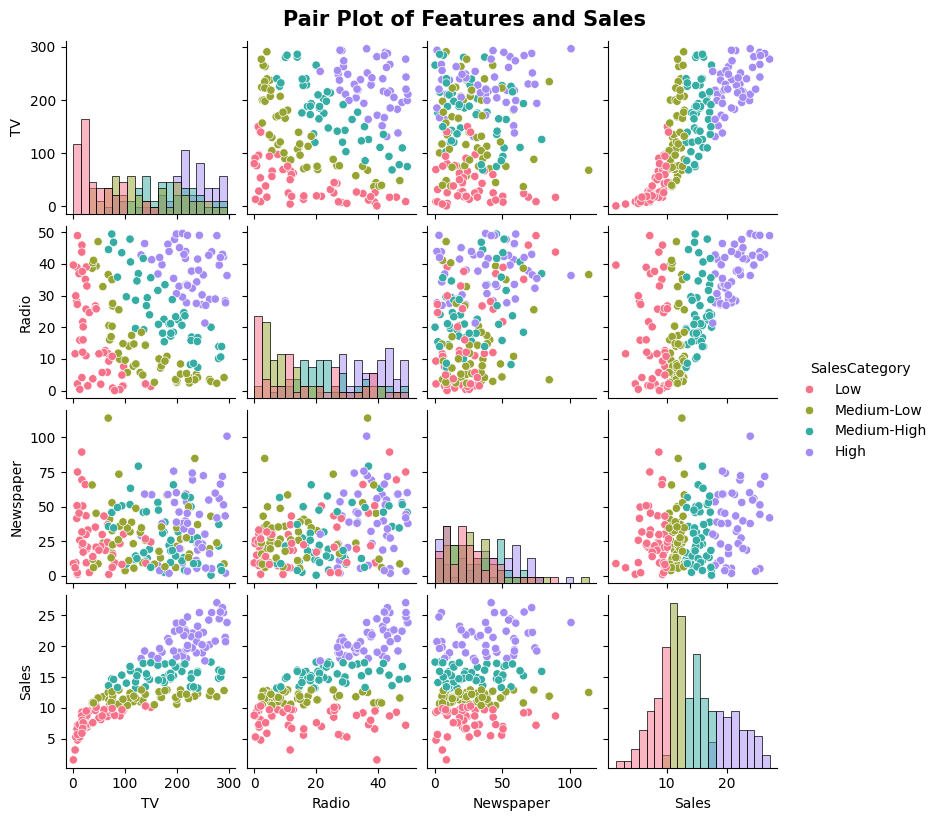

In [8]:
# Create a DataFrame from features and target
pair_plot_data = pd.DataFrame(features, columns=['TV', 'Radio', 'Newspaper'])
pair_plot_data['Sales'] = target

# Create a categorical hue variable (e.g., based on Sales quantiles)
pair_plot_data['SalesCategory'] = pd.qcut(pair_plot_data['Sales'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Create the pair plot with colored points and custom settings
sns.pairplot(pair_plot_data, diag_kind='hist', diag_kws={'bins': 20}, hue='SalesCategory', palette='husl', height=2)
plt.suptitle("Pair Plot of Features and Sales", y=1.02, fontsize=15, fontweight='bold')
plt.show()

###### Hypothesis
Using the pairplot function from the seaborn library, we can see the relationship between the features and the target variable rapidly. <br>

Here we can see that the TV Advertising budget appear to have the most effect on the Sales, followed by the Radio Advertising budget. <br>
The newspaper advertising budget seems however to have a very low effect on the Sales. <br>
All theses features seem to not be correlated with each other. <br>

For the TV and Radio features, we can see that the relationship with the Sales seems to be linear. If we increase the budget for TV or Radio, the Sales will increase. <br>
For the Newspaper feature, the relationship with the Sales seems to be more random whiteout any clear pattern. <br>

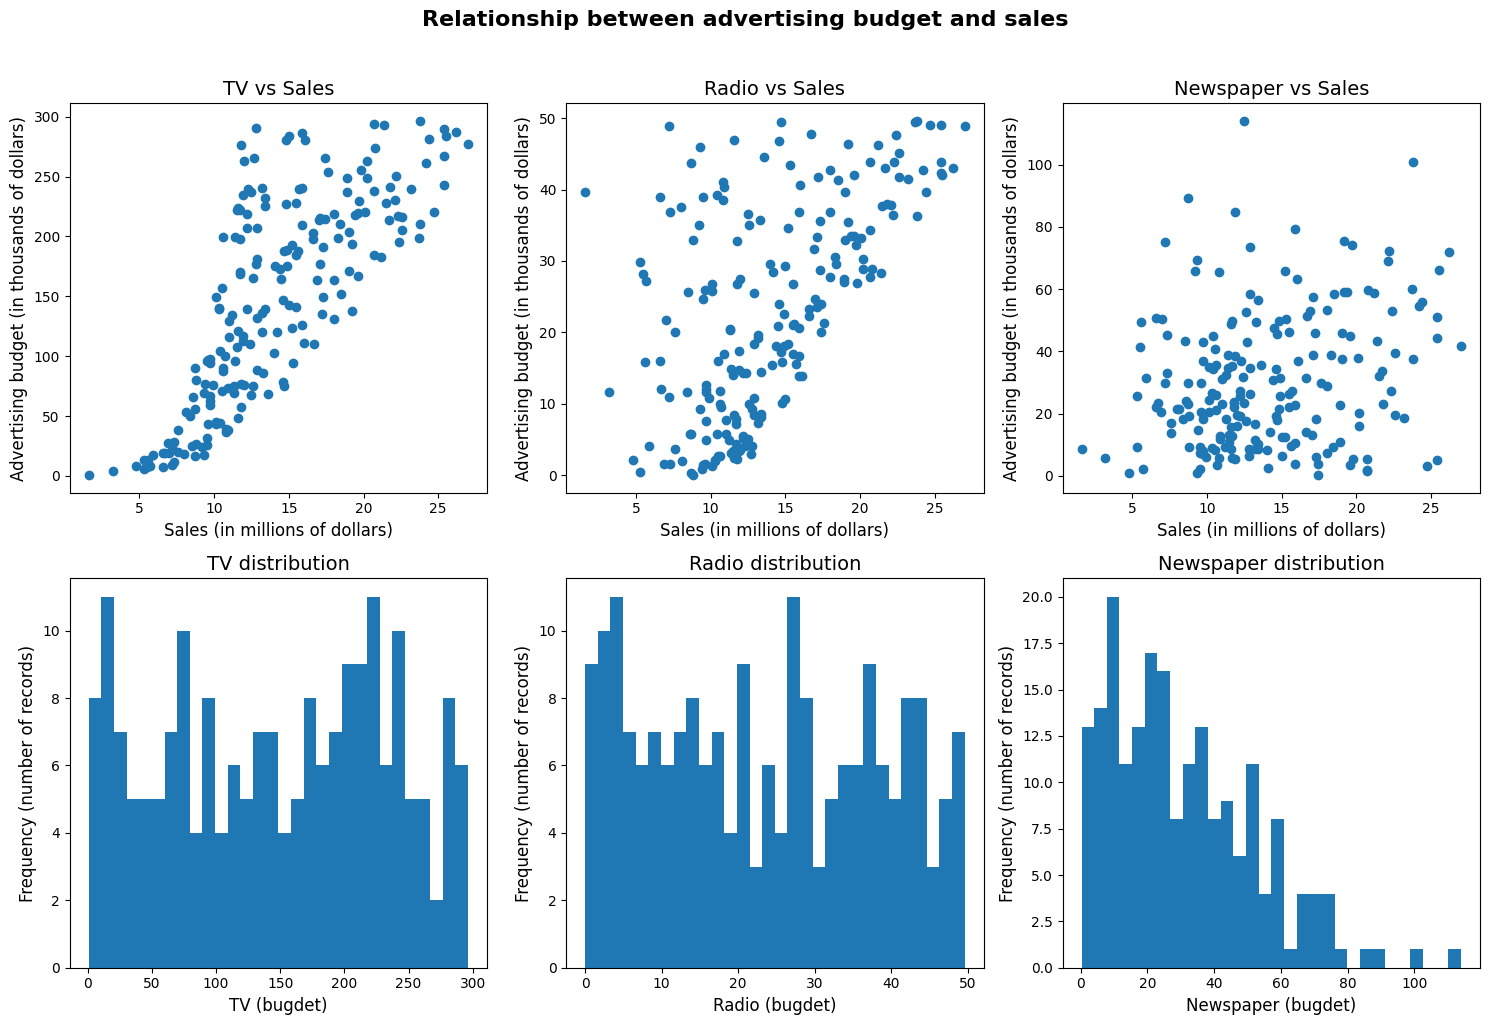

In [9]:
# Update the plotting code with inverted axes for scatter plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(len(feature_names)):
    
    # scatter plot to show the relationship between the feature and target
    axs[0,i].scatter(target, features[:, i])  
    axs[0,i].set_ylabel("Advertising budget (in thousands of dollars)", fontsize=12)
    axs[0,i].set_xlabel(target_name+ " (in millions of dollars)", fontsize=12)
    axs[0,i].set_title(f'{feature_names[i]} vs {target_name}', fontsize=14)
    axs[0,i].tick_params(axis='both', which='major', labelsize=10)
    
    # Histogram to show the distribution of the feature
    axs[1,i].hist(features[:, i], bins=30)
    axs[1,i].set_xlabel(feature_names[i] + " (bugdet)", fontsize=12)
    axs[1,i].set_ylabel('Frequency (number of records)', fontsize=12)
    axs[1,i].set_title(f'{feature_names[i]} distribution', fontsize=14)
    axs[1,i].tick_params(axis='both', which='major', labelsize=10)


# Add the main title to the plot
plt.suptitle("Relationship between advertising budget and sales", fontsize=16, fontweight='bold', y=1.02)


plt.tight_layout()
plt.show()

##### More Observations:
Feature TV 
- Seems to have a linear relationship with the target Sales. <br>
- The distribution of the data is uniform. <br>

Feature Radio 
- Seems to have a linear relationship with the target Sales but with more noise than TV. <br>
- The distribution of the data is uniform. <br>

Feature Newspaper
- seems to not really have a any relationship with the target Sales. <br>
- The distribution of the data is not uniform 
- For the histgram we can observe that there are more sales with smaller budgets than bigger budgets. <br>

All theses features are more switable for linear regression models because they seem to have a relationship with the target Sales witch is a continuous value. <br>

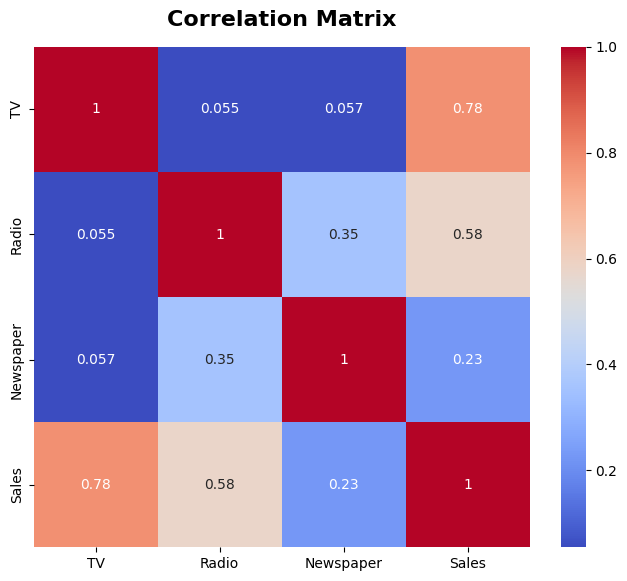

In [10]:
# Create a DataFrame from features and target
correlation_matrix_data = pd.DataFrame(features, columns=['TV', 'Radio', 'Newspaper'])
correlation_matrix_data['Sales'] = target

# Calculate the correlation matrix
correlation_matrix = correlation_matrix_data.corr()

# have a new variable for the names of the features
feature_and_target_names = ['TV', 'Radio', 'Newspaper', 'Sales']

# Plot the correlation matrix as a heatmap with custom colors
plt.figure(figsize=(8, 6.5))
sns.heatmap(correlation_matrix, annot=True, xticklabels=feature_and_target_names, yticklabels=feature_and_target_names, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=16, fontweight='bold', pad=15)
plt.show()

##### Correlation matrix interpretation
The TV feature seems to be a strong predictor of the Sales. For example, if we increase the TV budget, the Sales will increase too. <br>

The Radio feature and newspaper feature seem to have some correlation betweeen each other. That could be a similar spending strategies for both of them. <br>

The nespaper and TV features seem to have a low correlation between each other. <br>

---

### **2. Regression Analysis (40 points)**

#### **2.1: Train a Linear Regression Model (15 points)**
- Train a linear regression model for each feature and evaluate them.
- Display, print or plot any relevant information.
- Interpret the results.


##### Linear Regression Model for all the features

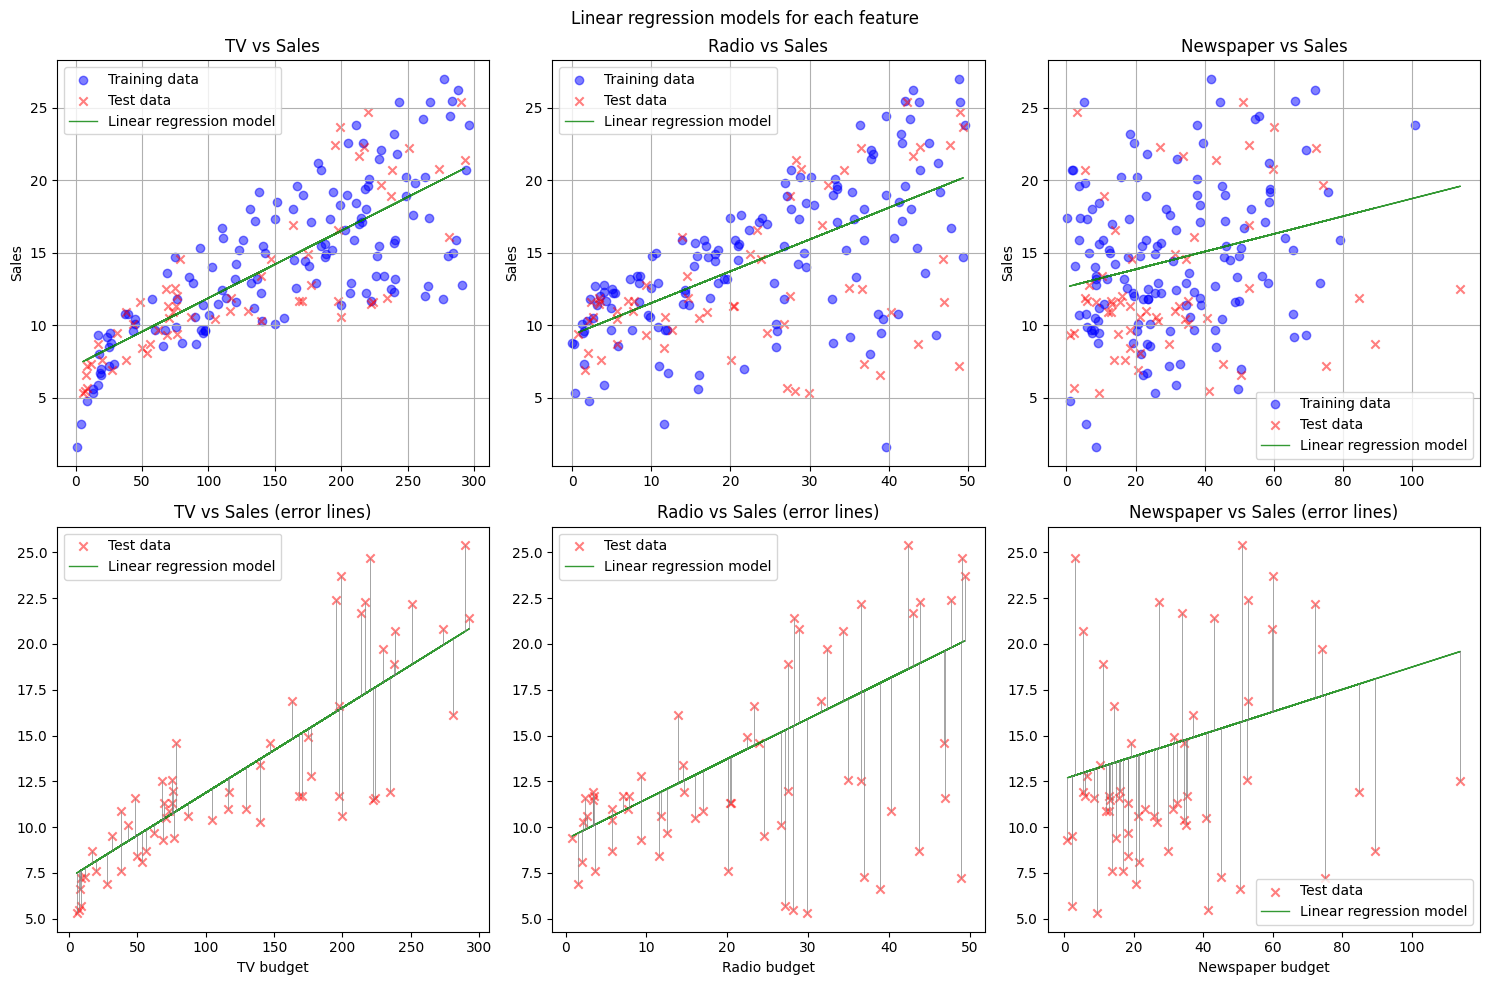

+-----------+--------------------------+---------------------------+-----------+-------------------------------+-----------+-------------+
|  Feature  | Mean Squared Error (MSE) | Mean Absolute Error (MAE) | R^2 Score | Residual Sum of Squares (RSS) | Intercept | Coefficient |
+-----------+--------------------------+---------------------------+-----------+-------------------------------+-----------+-------------+
|     TV    |          8.971           |           2.276           |   0.671   |            538.259            |   7.239   |    0.046    |
|   Radio   |          23.723          |           3.703           |   0.131   |            1423.389           |   9.339   |    0.219    |
| Newspaper |          28.869          |            4.56           |   -0.057  |            1732.152           |   12.642  |    0.061    |
+-----------+--------------------------+---------------------------+-----------+-------------------------------+-----------+-------------+
MSE lower is better, MAE lo

In [11]:
# subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# create a table to store the model performance
table = PrettyTable() 
table.field_names = ["Feature", "Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "R^2 Score", "Residual Sum of Squares (RSS)", "Intercept", "Coefficient"]

# Iterate over each feature
for i in range(len(feature_names)):
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features[:, i], target, test_size=TEST_SIZE, random_state=RANDOM_STATE)

    # Reshape the data to a 2D array for the model fit
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    Y_train = y_train.reshape(-1, 1)
    Y_test = y_test.reshape(-1, 1)
    
    # Create a linear regression model
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate residuals
    residuals = Y_test - y_pred
    
    # Plot the model
    axs[0,i].scatter(X_train, Y_train, color='blue', alpha=0.5,label='Training data')
    axs[0,i].scatter(X_test, Y_test, color='red', marker='x', alpha=0.5,label='Test data')
    axs[1,i].scatter(X_test, Y_test, color='red', marker='x', alpha=0.5,label='Test data')
    axs[0,i].plot(X_test, y_pred, color='green', linewidth=1, alpha=0.8, label='Linear regression model')
    axs[1,i].plot(X_test, y_pred, color='green', linewidth=1, alpha=0.8, label='Linear regression model')
    
    # Plot the error lines
    for j in range(len(X_test)):
        axs[1,i].plot([X_test[j], X_test[j]], [Y_test[j], y_pred[j]], color='gray', linewidth=0.5)
    
    axs[0,i].set_title(f'{feature_names[i]} vs Sales')
    axs[1,i].set_xlabel(f'{feature_names[i]} budget')
    axs[0,i].set_ylabel('Sales')
    axs[0,i].grid(True)
    axs[0,i].legend()
    
    axs[1,i].set_title(f'{feature_names[i]} vs Sales (error lines)')
    axs[1,i].legend()
    
    # Calculate the model performance
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    rss = np.sum(residuals**2)
    intercept = model.intercept_[0]
    coef = model.coef_[0][0]
    
    # Add the results to the table
    table.add_row([feature_names[i], round(mse, 3), round(mae, 3), round(r2, 3), round(rss, 3), round(intercept, 3), round(coef, 3)])
    
fig.suptitle('Linear regression models for each feature')
fig.tight_layout()

plt.show()

print(table)
print("MSE lower is better, MAE lower is better, R^2 Score higher is better", "RSS lower is better", "Intercept is the y-intercept", "Coef is the slope of the line")

###### Interpretation of the results

Between the three features, TV seems to be the most suitable for a linear regression model because it has the highest R² score along with the lowest MSE and MAE. <br>

For the TV feature :
- The R² score has a value that show that the model is generally not too bad at predicting the target Sales. <br>
- The MSE has a low value, which means that the model is good at predicting the target Sales. <br>
- But in general, the model is clearly not perfect because the R² score is not close enough to 1. <br>

For the Radio feature :
- The R² score has a value thas is really close to 0 which means that the model is not good at predicting the target Sales. <br>
- The MSE has a high value, which means that the model is also not good at predicting the target Sales. <br>

For the Newspaper feature :
- The R² score is negative, which means that the model is worse than a horizontal line. <br>
- This is because the feature Newspaper does not have a relationship with the target Sales. The value of this feature does not affect the target Sales. <br>
- The MSE has a high value, which means that the model is also not good at predicting the target Sales. <br>

###### Global Interpretation of the results

The regression line that represents the relationship between the TV feature and the target Sales have a slighly steeper slope than the other feature regression line. That means that the TV feature has a bigger impact on the target Sales than the other features. <br>


#### **2.2: Polynomial Features (25 points)**
- Extend the regression model by adding polynomial features.
- Evaluate the models performances.
- Display, print or plot any relevant information.
- Discuss which model fits the data best and why.

##### Polynomial Regression Model for all the features

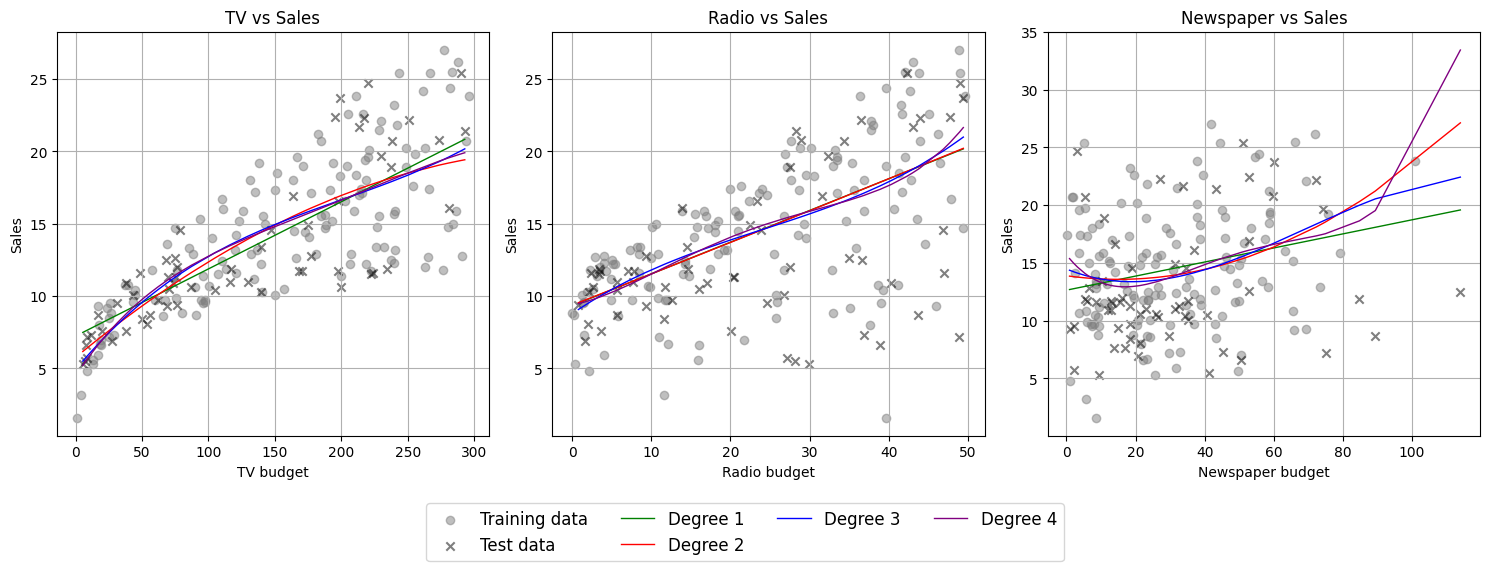

+-----------------------------------------------------------------------------------------------------------------------+
|                                                   Models Performance                                                  |
+-----------+--------+--------------------------+---------------------------+-----------+-------------------------------+
|  Feature  | Degree | Mean Squared Error (MSE) | Mean Absolute Error (MAE) | R^2 Score | Residual Sum of Squares (RSS) |
+-----------+--------+--------------------------+---------------------------+-----------+-------------------------------+
|     TV    |   1    |          8.971           |           2.276           |   0.671   |            538.259            |
|     TV    |   2    |          9.416           |           2.351           |   0.655   |            564.934            |
|     TV    |   3    |          9.422           |           2.368           |   0.655   |             565.29            |
|     TV    |   4    |  

In [12]:
# Constant
MAX_DEGREE = 4 # Maximum degree of the polynomial

# Create a subplot with 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define colors for different degrees
colors = ['green', 'red', 'blue', 'purple']

# Create array of degrees
degrees = np.arange(1, MAX_DEGREE + 1)

# To use the colors in sequence matching degrees length:
color_sequence = [colors[i % len(colors)] for i in range(20)]

# create table to store the model performance metrics for each feature and for each degree
performance = PrettyTable()
performance.field_names = ["Feature", "Degree", "Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "R^2 Score", "Residual Sum of Squares (RSS)"]
performance.title = 'Models Performance'

# Iterate over each feature
for i in range(len(feature_names)):
    # Split data once per feature
    X_train, X_test, y_train, y_test = train_test_split(features[:, i], target, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    
    # Plot data points
    axs[i].scatter(X_train, y_train, color='gray', alpha=0.5, label='Training data')
    axs[i].scatter(X_test, y_test, color='black', marker='x', alpha=0.5, label='Test data')
    
    # Reshape data 
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Sort X_test for smooth line plotting only
    X_test_sorted = np.sort(X_test, axis=0)

    # Iterate over each degree
    for deg, color in zip(degrees, color_sequence):
        # Create polynomial features
        poly = PolynomialFeatures(degree=deg)
        X_train_poly = poly.fit_transform(X_train)
        
        # Create two versions of test data - sorted (for plotting) and unsorted (for metrics)
        X_test_poly = poly.transform(X_test)                # unsorted - for metrics
        X_test_sorted_poly = poly.transform(X_test_sorted)  # sorted - for plotting
        
        # Fit model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # Plot using sorted data
        y_pred_plot = model.predict(X_test_sorted_poly)
        axs[i].plot(X_test_sorted, y_pred_plot, color=color, linewidth=1, label=f'Degree {deg}')
        
        # Calculate metrics using unsorted data
        y_pred = model.predict(X_test_poly)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        rss = np.sum((y_test - y_pred)**2)
        
        # Append to the performance table
        performance.add_row([feature_names[i], deg, round(mse, 3), round(mae, 3), round(r2, 3), round(rss, 3)])
    
    # Add labels and title to the plot
    axs[i].set_title(f'{feature_names[i]} vs Sales')
    axs[i].set_xlabel(f'{feature_names[i]} budget')
    axs[i].set_ylabel('Sales')
    axs[i].grid(True)

# Add a single legend below all the subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize='12')

plt.tight_layout()
plt.show()

# Display the performance table
print(performance)
print("MSE lower is better, MAE lower is better, R2 higher is better and if negative, model is worse than a horizontal line, RSS lower is better")

###### Observations:
For all the features. the polynomial regression models doesn't have better performances than the linear regression models. <br> 
We think that is because the relationship between the features and the target Sales is either linear nor polynomial. <br>

For the 2 first TV , the relationship with the target Sales seems to be a cone shape. <br>

For the Radio feature, the relationship with the target Sales seems to be a cone shape but with more noise than TV. The share of this relationship look like a area under a curve. <br>

Lastly, the Newspaper feature does not have a particular shape or relationship with the target Sales. <br> that why the regression models are not good at predicting the target Sales. <br>
With the polynomial regression models for this feature, the R² score become more negative and the MSE become higher. <br>

We have decided to only show you the first 4 polynomial degrees because the performances of the models are already bad. having higher degrees will not change the results and will just make the graph less readable. Higher degrees will just make the model overfit the data because of the small size of the dataset. <br>

---

## **Task 2: Predicting High Sales with Classification**

In this task, you will create a binary classification model to predict whether sales are above a certain threshold based on the advertising data. This will help you understand how classification models can be applied to predict categories based on features.

### **1. Dataset Generation (10 points)**

#### **1.1: Transform the advertising dataset for classification (5 points)**

- Convert the target variable into a binary classification problem using the threshold of your choice.
- Display, print or plot any relevant information.
- Explain your threshold choice.

##### Transformation of the target variable into a binary classification problem

High_Sales
0    102
1     98
Name: count, dtype: int64
Mean (Average Sales): 14.02
Median Sales: 12.90
High_Sales
0    102
1     98
Name: count, dtype: int64


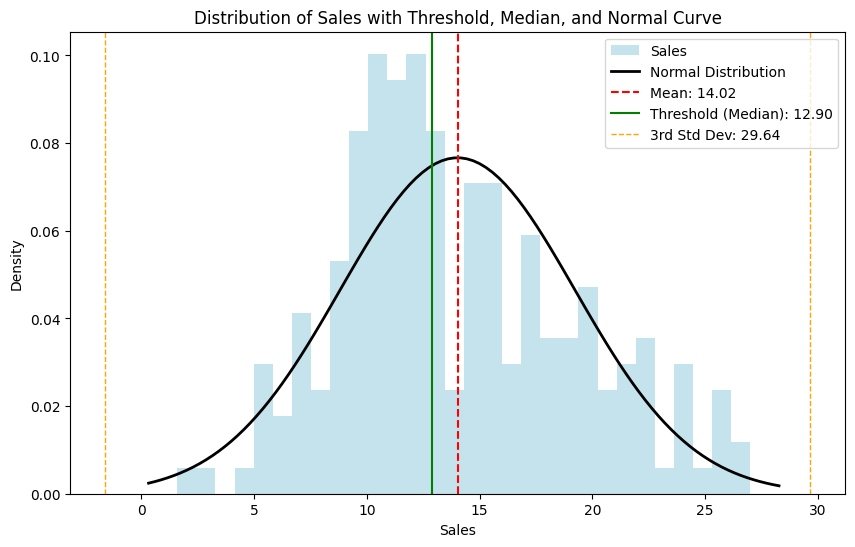

In [13]:
# Calculate the mean
mean = df['Sales'].mean()

# Calculate the median
median = df['Sales'].median()

# Use the median as the threshold
threshold = median

# Convert the target variable into binary classes
df['High_Sales'] = (df['Sales'] > threshold).astype(int)
print(df['High_Sales'].value_counts())
print("=====================================")

# Display relevant information
print(f"Mean (Average Sales): {mean:.2f}")
print(f"Median Sales: {median:.2f}")
print(df['High_Sales'].value_counts())

# Plot the distribution of sales, the threshold, and the median
plt.figure(figsize=(10, 6))
# Histogram
plt.hist(df['Sales'], bins=30, alpha=0.7, label='Sales', density=True, color='lightblue')

# Add normal distribution curve
mu, std = norm.fit(df['Sales'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Add threshold and median lines
plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='g', linestyle='-', label=f'Threshold (Median): {median:.2f}')

# Add standard deviation lines
plt.axvline(mean + 3*std, color='orange', linestyle='--', label=f'3rd Std Dev: {mean + 3*std:.2f}', linewidth=1)
plt.axvline(mean - 3*std, color='orange', linestyle='--',linewidth=1)

# Labels and title
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Distribution of Sales with Threshold, Median, and Normal Curve')
plt.legend()
plt.show()

###### Analysis
We have decided to use a threshold of the median of the target Sales to be able to have the same number of samples in each class. <br>
In addition the median is a good threshold because it is not affected by the outliers. <br>

On this graph above, we have also shown the mean of the target Sales. to show that the median is a better threshold than the mean. <br>

This division of the target Sales into two classes will allow to run some classification models to predict if the Sales will be high or low later on. <br>

#### **1.2: Exploratory data analysis (5 points)**

- Display, print or plot any relevant information.
- How is each feature doing on this new classification task?

##### Boxplot of the features with the new target variable

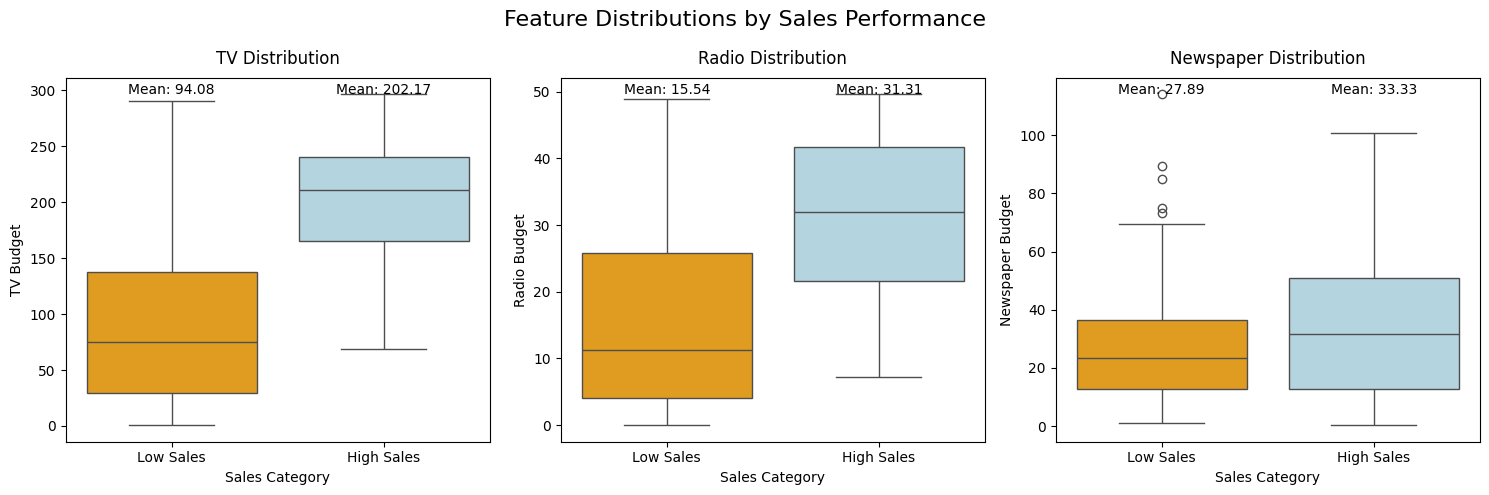

In [14]:
# Create subplots for feature visualization
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Custom color palette
colors = ['orange', 'lightblue']

for i in range(len(feature_names)):
    # Create boxplot with custom colors - removed hue parameter
    sns.boxplot(x='High_Sales', y=feature_names[i], data=df, 
                ax=axs[i], palette=colors, hue='High_Sales',legend=False)
    
    # Customize labels and title
    axs[i].set_title(f'{feature_names[i]} Distribution', pad=10)
    axs[i].set_xlabel('Sales Category')
    
    # setting ticks first, then labels (to avoid error message)
    axs[i].set_xticks([0, 1])
    axs[i].set_xticklabels(['Low Sales', 'High Sales'])
    axs[i].set_ylabel(feature_names[i] + ' Budget')
    
    # Add mean values as text
    means = df.groupby('High_Sales')[feature_names[i]].mean()
    for j, mean in enumerate(means):
        axs[i].text(j, df[feature_names[i]].max(), 
                   f'Mean: {mean:.2f}', 
                   horizontalalignment='center')

plt.suptitle('Feature Distributions by Sales Performance', fontsize=16)
plt.tight_layout()
plt.show()


###### Interpretation of the boxplot

We have decided to plot the boxplot of the features for each class whith the new binary target Sales. This will help us to see the distribution of the data for each newly created classes. <br>

Mean = average value that shows us the average sales quantity for each of our cathegories. It give us a general view of our number of sales for both the TV, Radio and Newspaper. <br>

From the first and second boxplot, we can clearly see that the TV and Radio features have both a huge growth of sales the higher the budget. we also got a nice coverage of most our values. This is sadly not the case for our Newspaper, which despite having higher budget than the Radio for it's high sales it has a comparable Mean value (33,33 VS 31,21), and has a rather slow growth, which shows us clearly that newpapers sell way less than the other 2 medias.<br>

The Fact our boxplots are rather separate for the first two models shows this new created feature shall be good for a regrssion model. On the third one though, we can observe that the the budget has almost no impact at all on the sales, so it would be better to not use this feature for our model. <br>
For our test we will keep it, but we will not expect much from it. <br>


In [15]:
# create a variable to store the new taget variable
target_classified = df['High_Sales']

##### Plot the data with the new target Sales (binary)

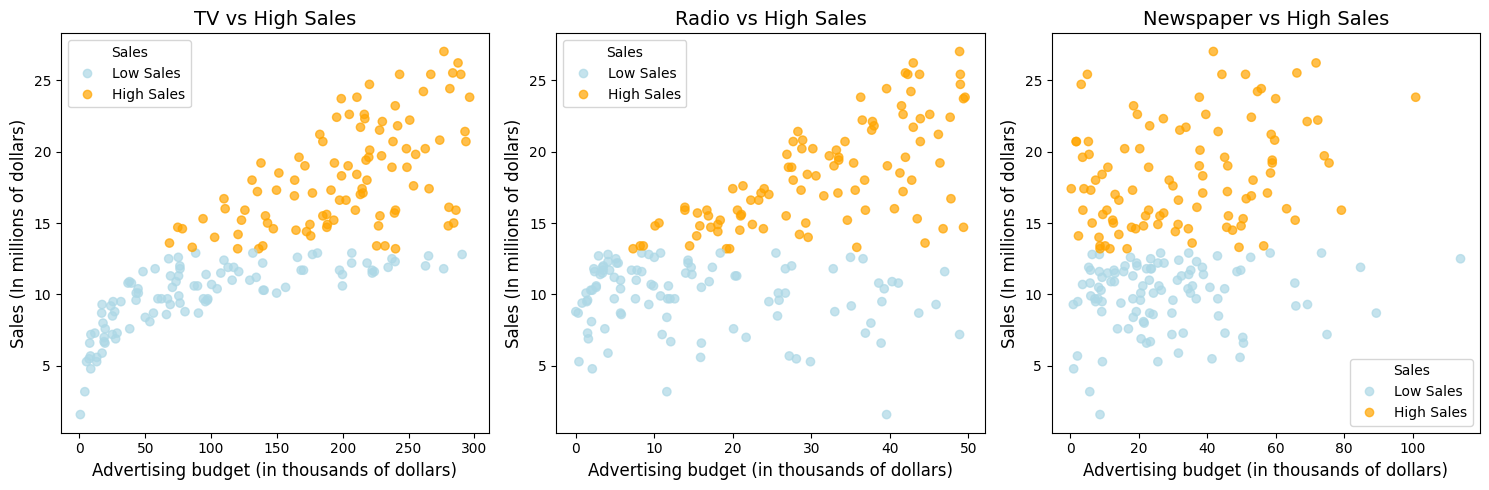

In [16]:
# Assuming feature_names, target_classified, and features are already defined
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# define colors for the scatter plot
cmap = mcolors.ListedColormap(['lightblue', 'orange'])

for i in range(len(feature_names)):
    # Scatter plot for the first row
    scatter = axs[i].scatter(features[:, i], target, c=target_classified, cmap=cmap, alpha=0.7)
    axs[i].set_ylabel("Sales (In millions of dollars)", fontsize=12)
    axs[i].set_xlabel("Advertising budget (in thousands of dollars)", fontsize=12)
    axs[i].set_title(f'{feature_names[i]} vs High Sales', fontsize=14)
    axs[i].tick_params(axis='both', which='major', labelsize=10)
    
    # Update legend to show "Low Sales" and "High Sales"
    legend_labels = {0: 'Low Sales', 1: 'High Sales'}
    handles, labels = scatter.legend_elements()
    labels = [legend_labels[int(label.strip('$\\mathdefault{}'))] for label in labels]
    axs[i].legend(handles, labels, title='Sales')

plt.tight_layout()
plt.show()

###### Interpretation of the plot
Here we can see that the 2 classification are well balanced because we have the same number of samples in each class.so we have the same number of samples in each class. <br>

---

### **2. Classification (40 points)**

#### **2.1: Model Training and Evaluation (20 points)**

- Train several classification models and evaluate them.
- Display, print or plot any relevant information.
- Interpret the results.


In [17]:
# Create results DataFrame with model column
classification_results = PrettyTable()
classification_results.field_names = ['Feature', 'Model', 'Accuracy', 'Precision (sensitivity)', 'Recall (specificity)', 'F1', 'CV_Score']

##### Model 1 : Decision Tree Classifier + confusion matrix

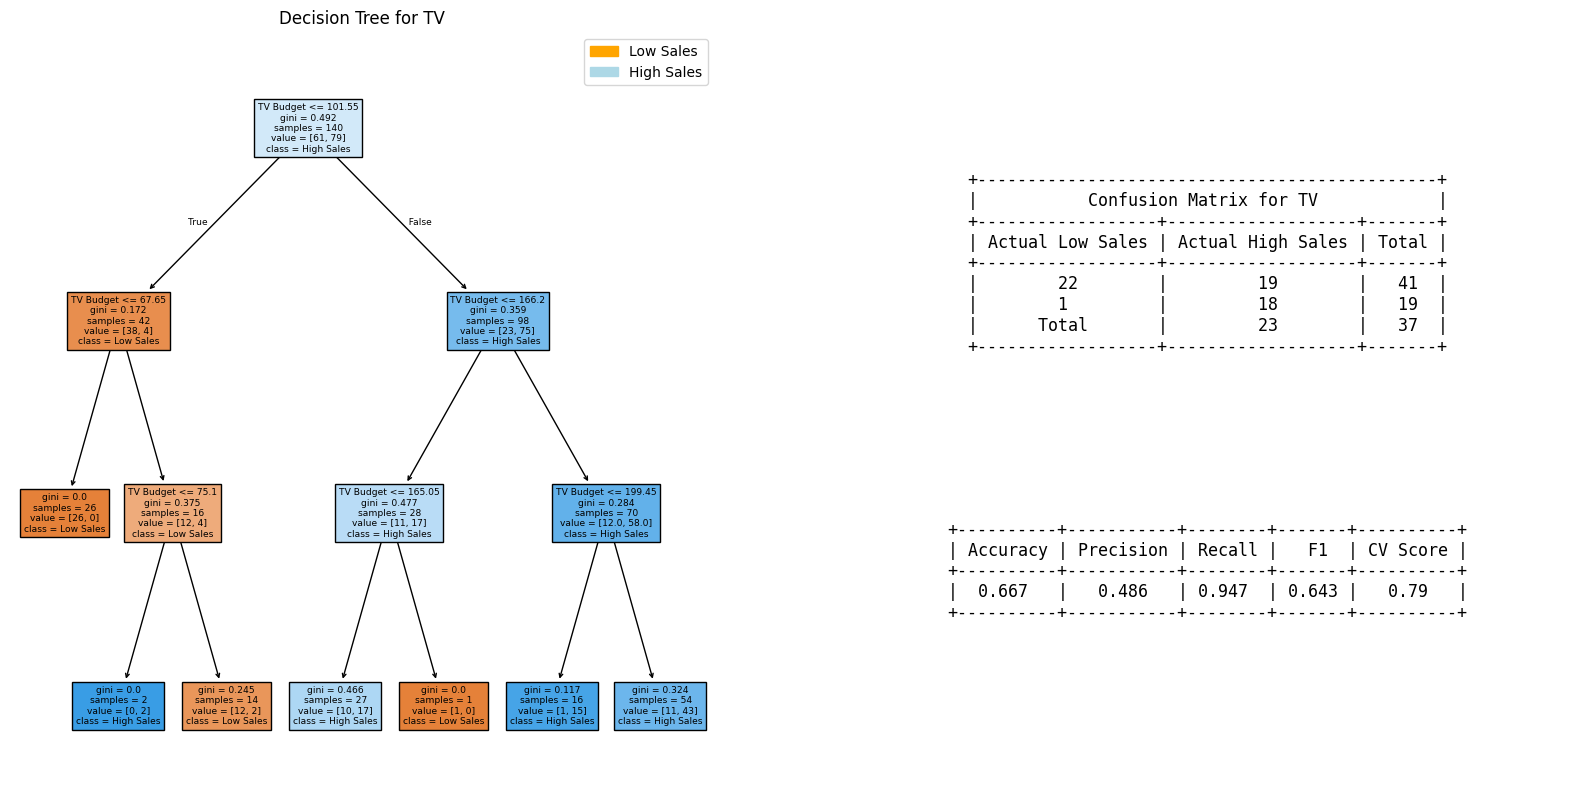

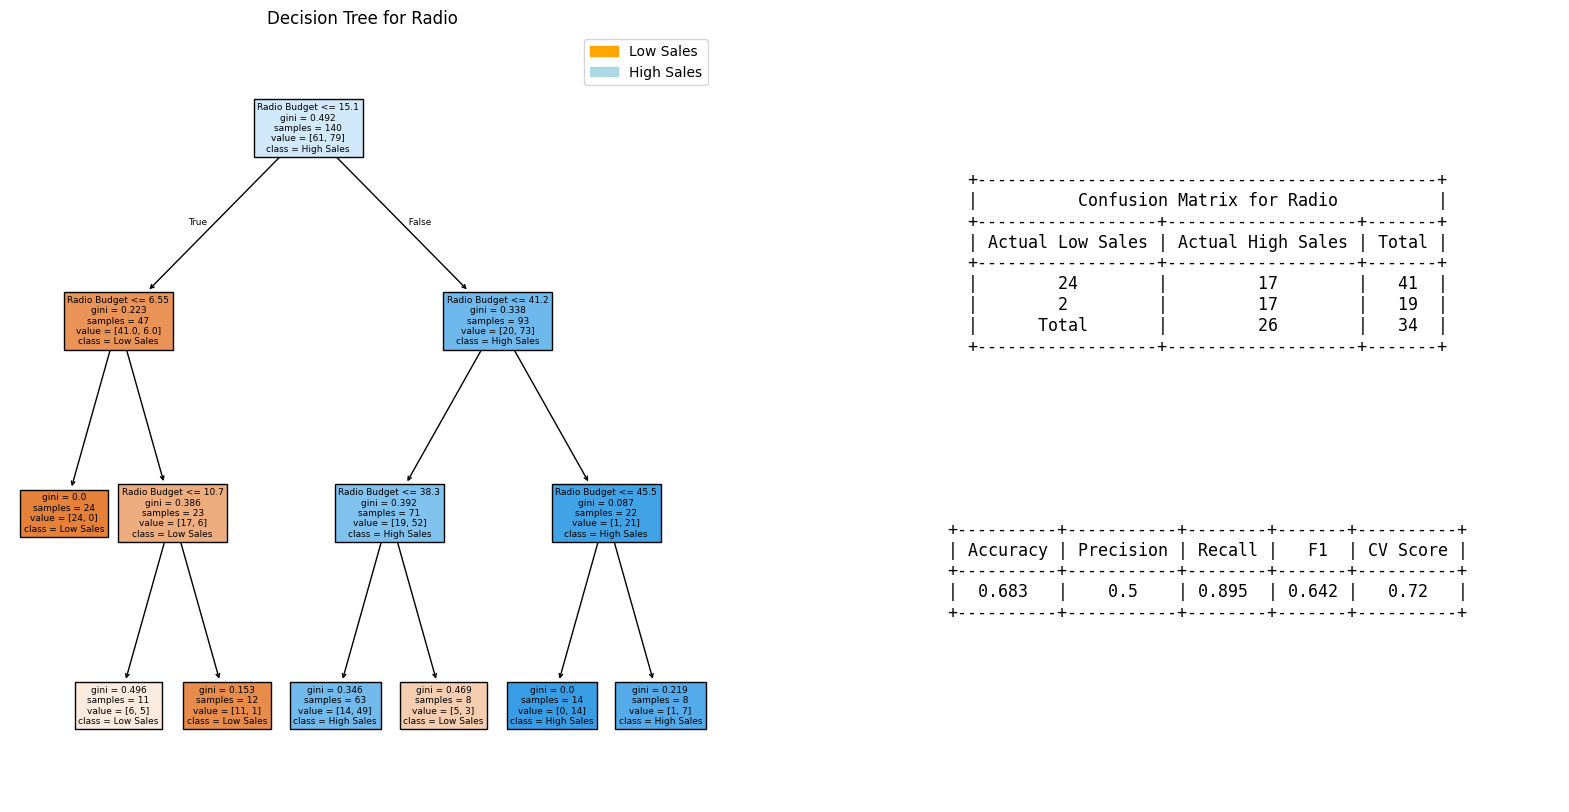

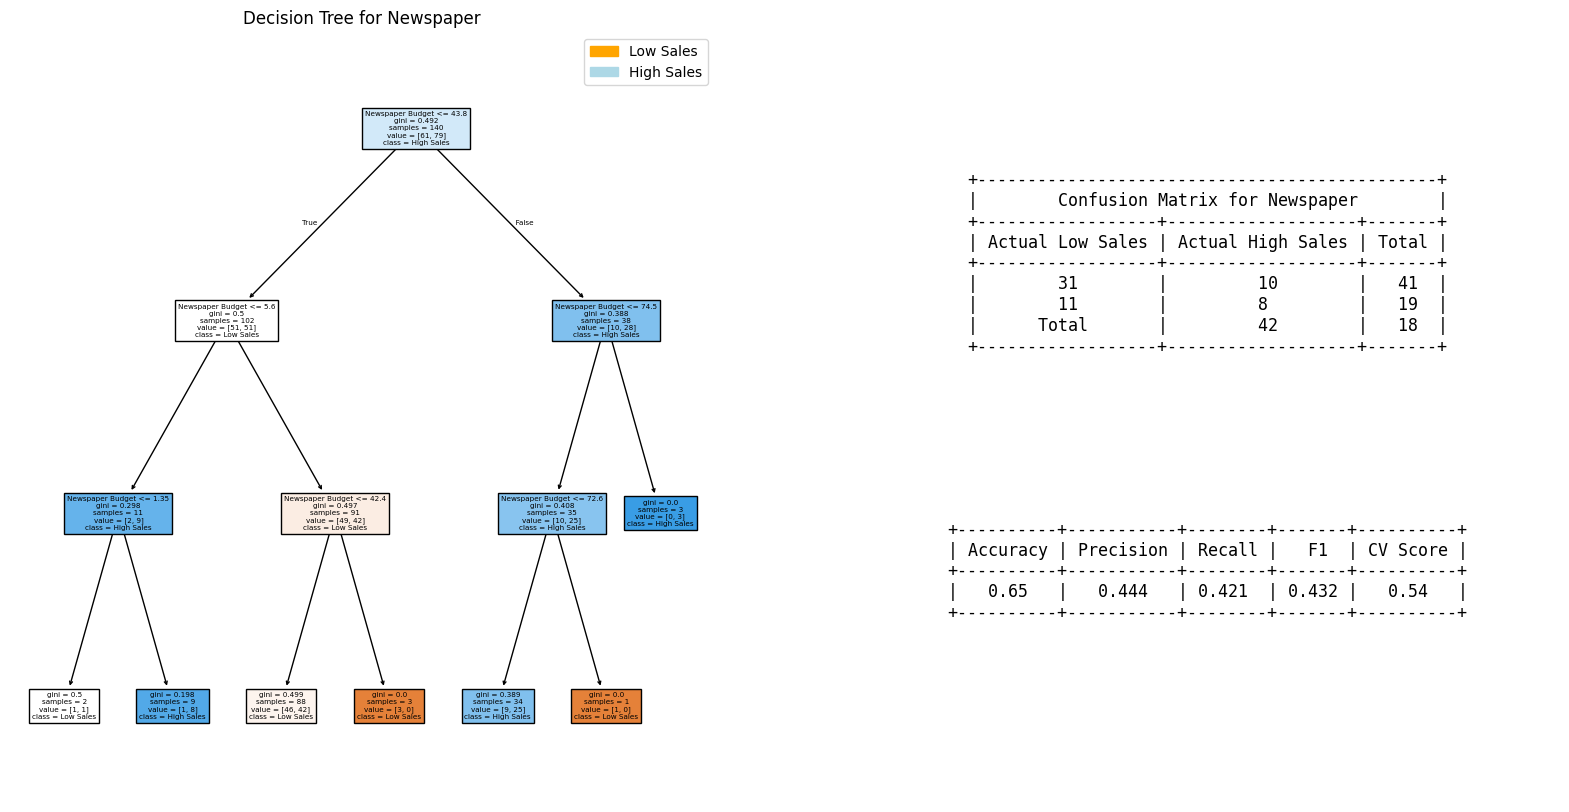

In [18]:
# Iterate over each feature and fit a Decision Tree Classifier
for i in range(len(feature_names)):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(features[:, i].reshape(-1, 1), target_classified, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    
    # Fit model
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=3)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = classification_report(y_test, y_pred, output_dict=True)['1'].values()
    cv_score = cross_val_score(model, features[:, i].reshape(-1, 1), target_classified, cv=5).mean() # 5-fold cross-validation score 
    
    # Append to results DataFrame
    classification_results.add_row([feature_names[i], 'Decision Tree', round(accuracy, 3), round(precision, 3), round(recall, 3), round(f1, 3), round(cv_score, 3)] )
    
    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    # Plot the decision tree
    plot_tree(model, filled=True, feature_names=[feature_names[i]+' Budget'], class_names=['Low Sales', 'High Sales'], ax=ax[0])
    ax[0].set_title(f'Decision Tree for {feature_names[i]}')

    # Add legend to the colors
    high_sales_patch = mpatches.Patch(color='orange', label='Low Sales')
    low_sales_patch = mpatches.Patch(color='lightblue', label='High Sales')
    ax[0].legend(handles=[high_sales_patch, low_sales_patch])

    # Print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    table = PrettyTable()
    table.title = f'Confusion Matrix for {feature_names[i]}'
    table.field_names = ['Actual Low Sales', 'Actual High Sales', 'Total']
    table.add_row([cm[0, 0], cm[0, 1], cm[0, 0] + cm[0, 1]])
    table.add_row([cm[1, 0], cm[1, 1], cm[1, 0] + cm[1, 1]])
    table.add_row(['Total', cm[0, 0] + cm[1, 0], cm[0, 1] + cm[1, 1]])
    
    # Display under the tree graph one more line with the result on one line table format
    display_results = PrettyTable()
    display_results.field_names = ["Accuracy", "Precision", "Recall", "F1", "CV Score"]
    display_results.add_row([round(accuracy, 3), round(precision, 3), round(recall, 3), round(f1, 3), round(cv_score, 3)])
  
    # Display the confusion matrix as text in the second subplot
    ax[1].axis('off')
    ax[1].text(0.5, 0.7, str(table), horizontalalignment='center', verticalalignment='center', fontsize=12, family='monospace')
    ax[1].text(0.5, 0.3, str(display_results), horizontalalignment='center', verticalalignment='center', fontsize=12, family='monospace')

    plt.show()

###### Interpretation of the results
The results shows that while these decision trees can predict sales categories with a moderate accuracy (F1 score = ~0.6), so this model is not good at predicting sales. 
We can clearly see that there are lots of false negatives. This is because the recall is high. this means that the model is better at predicting the low sales but not the high sales. <br>

In [19]:
# Function to evaluate a classifier model
def evaluate_classifier(model, model_name, classification_results, show_normalized=True):
    """Evaluate a classifier model using the features and target_classified variables. The function fits the model, makes predictions, calculates performance metrics, and visualizes the results.

    Args:
        model (_type_): Model object to evaluate.
        model_name (_type_): The display name of the model.
        classification_results (_type_): A PrettyTable object to store the results.
        show_normalized (bool, optional): Whether to show the normalized data. Defaults to True to show the normalized data.

    Returns:
        _type_: The classification_results table with the results of the model evaluation.
    """
    num_features = len(feature_names)
    # Calculate the number of rows and columns for subplots
    num_rows = 3
    num_cols = 3
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(24, num_rows * 6))
    axes = axes.flatten()
    scaler = StandardScaler()
    
    plot_index = 0
    for i in range(num_features):
        # # Get feature data
        X_feature = features[:, i].reshape(-1, 1)
        
        # Create data types
        if show_normalized:
            data_types = [('Normalized', scaler.fit_transform(X_feature))]
        else:
            data_types = [('Non-normalized', X_feature)]
        
        for data_type, X_data in data_types:
            # Split data 
            X_train, X_test, y_train, y_test = train_test_split(X_data, target_classified, test_size=TEST_SIZE, random_state=RANDOM_STATE)
            
            # Fit model
            model.fit(X_train, y_train)
            
            # Make predictions
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability estimates for ROC curve
            
            # Calculate model performance
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True)
            precision = report['1']['precision']
            recall = report['1']['recall']
            f1 = report['1']['f1-score']
            cv_score = cross_val_score(model, X_data, target_classified, cv=5).mean()
            
            # Append to results DataFrame
            classification_results.add_row([feature_names[i], model_name, round(accuracy, 3), round(precision, 3), round(recall, 3), round(f1, 3), round(cv_score, 3)] )
            
            # Plot predicted values
            predictions = model.predict(X_data)
            ax = axes[plot_index]
            
            ax.scatter(X_data[predictions == 0], target[predictions == 0], c='orange', alpha=0.7, label='Predicted Low Sales')
            ax.scatter(X_data[predictions == 1], target[predictions == 1], c='lightblue', alpha=0.7, label='Predicted High Sales')
            
            # Highlight errors in different colors
            false_positives = (predictions == 1) & (target_classified == 0)
            false_negatives = (predictions == 0) & (target_classified == 1)
            
            ax.scatter(X_data[false_positives], target[false_positives], c='blue', label='False Positives')
            ax.scatter(X_data[false_negatives], target[false_negatives], c='red', label='False Negatives')
            
            ax.set_xlabel(f"{feature_names[i]} ({data_type})")
            ax.set_ylabel('Sales')
            ax.set_title(f'Predicted Values and Errors for {feature_names[i]} ({data_type})')
            ax.legend()
            
            # Build confusion matrix table
            cm = confusion_matrix(y_test, y_pred)
            table = PrettyTable()
            table.title = f'Confusion Matrix for {feature_names[i]} ({data_type})'
            table.field_names = ['Actual \\ Predicted', 'Low Sales', 'High Sales', 'Total']
            table.add_row(['Low Sales', cm[0,0], cm[0,1], cm[0,0] + cm[0,1]])
            table.add_row(['High Sales', cm[1,0], cm[1,1], cm[1,0] + cm[1,1]])
            table.add_row(['Total', cm[0,0] + cm[1,0], cm[0,1] + cm[1,1], cm.sum()])
            
            display_results = PrettyTable()
            display_results.field_names = ["Accuracy", "Precision", "Recall", "F1", "CV Score"]
            display_results.add_row([round(accuracy, 3), round(precision, 3), round(recall, 3), round(f1, 3), round(cv_score, 3)])
            
            # Display the confusion matrix as text
            ax = axes[plot_index + 1]
            ax.axis('off')
            ax.text(0.5, 0.7, str(table), horizontalalignment='center', verticalalignment='center', fontsize=12, family='monospace')
            ax.text(0.5, 0.3, str(display_results), horizontalalignment='center', verticalalignment='center', fontsize=12, family='monospace')
            ax.set_title(f'Confusion Matrix for {feature_names[i]} ({data_type})')
            
            # Plot ROC curve
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            ax = axes[plot_index + 2]
            ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
            ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            ax.set_xlim([0.0, 1.0])
            ax.set_ylim([0.0, 1.05])
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate')
            ax.set_title(f'ROC Curve for {feature_names[i]} ({data_type})')
            ax.legend(loc="lower right")
            
            plot_index += 3
            
    # Add a main title to the plot
    plt.suptitle(model_name + " Relationship between advertising budget and sales", fontsize=20, y=0.95)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()
    
    return classification_results

##### Model 2 : KNN + confusion matrix + ROC curve

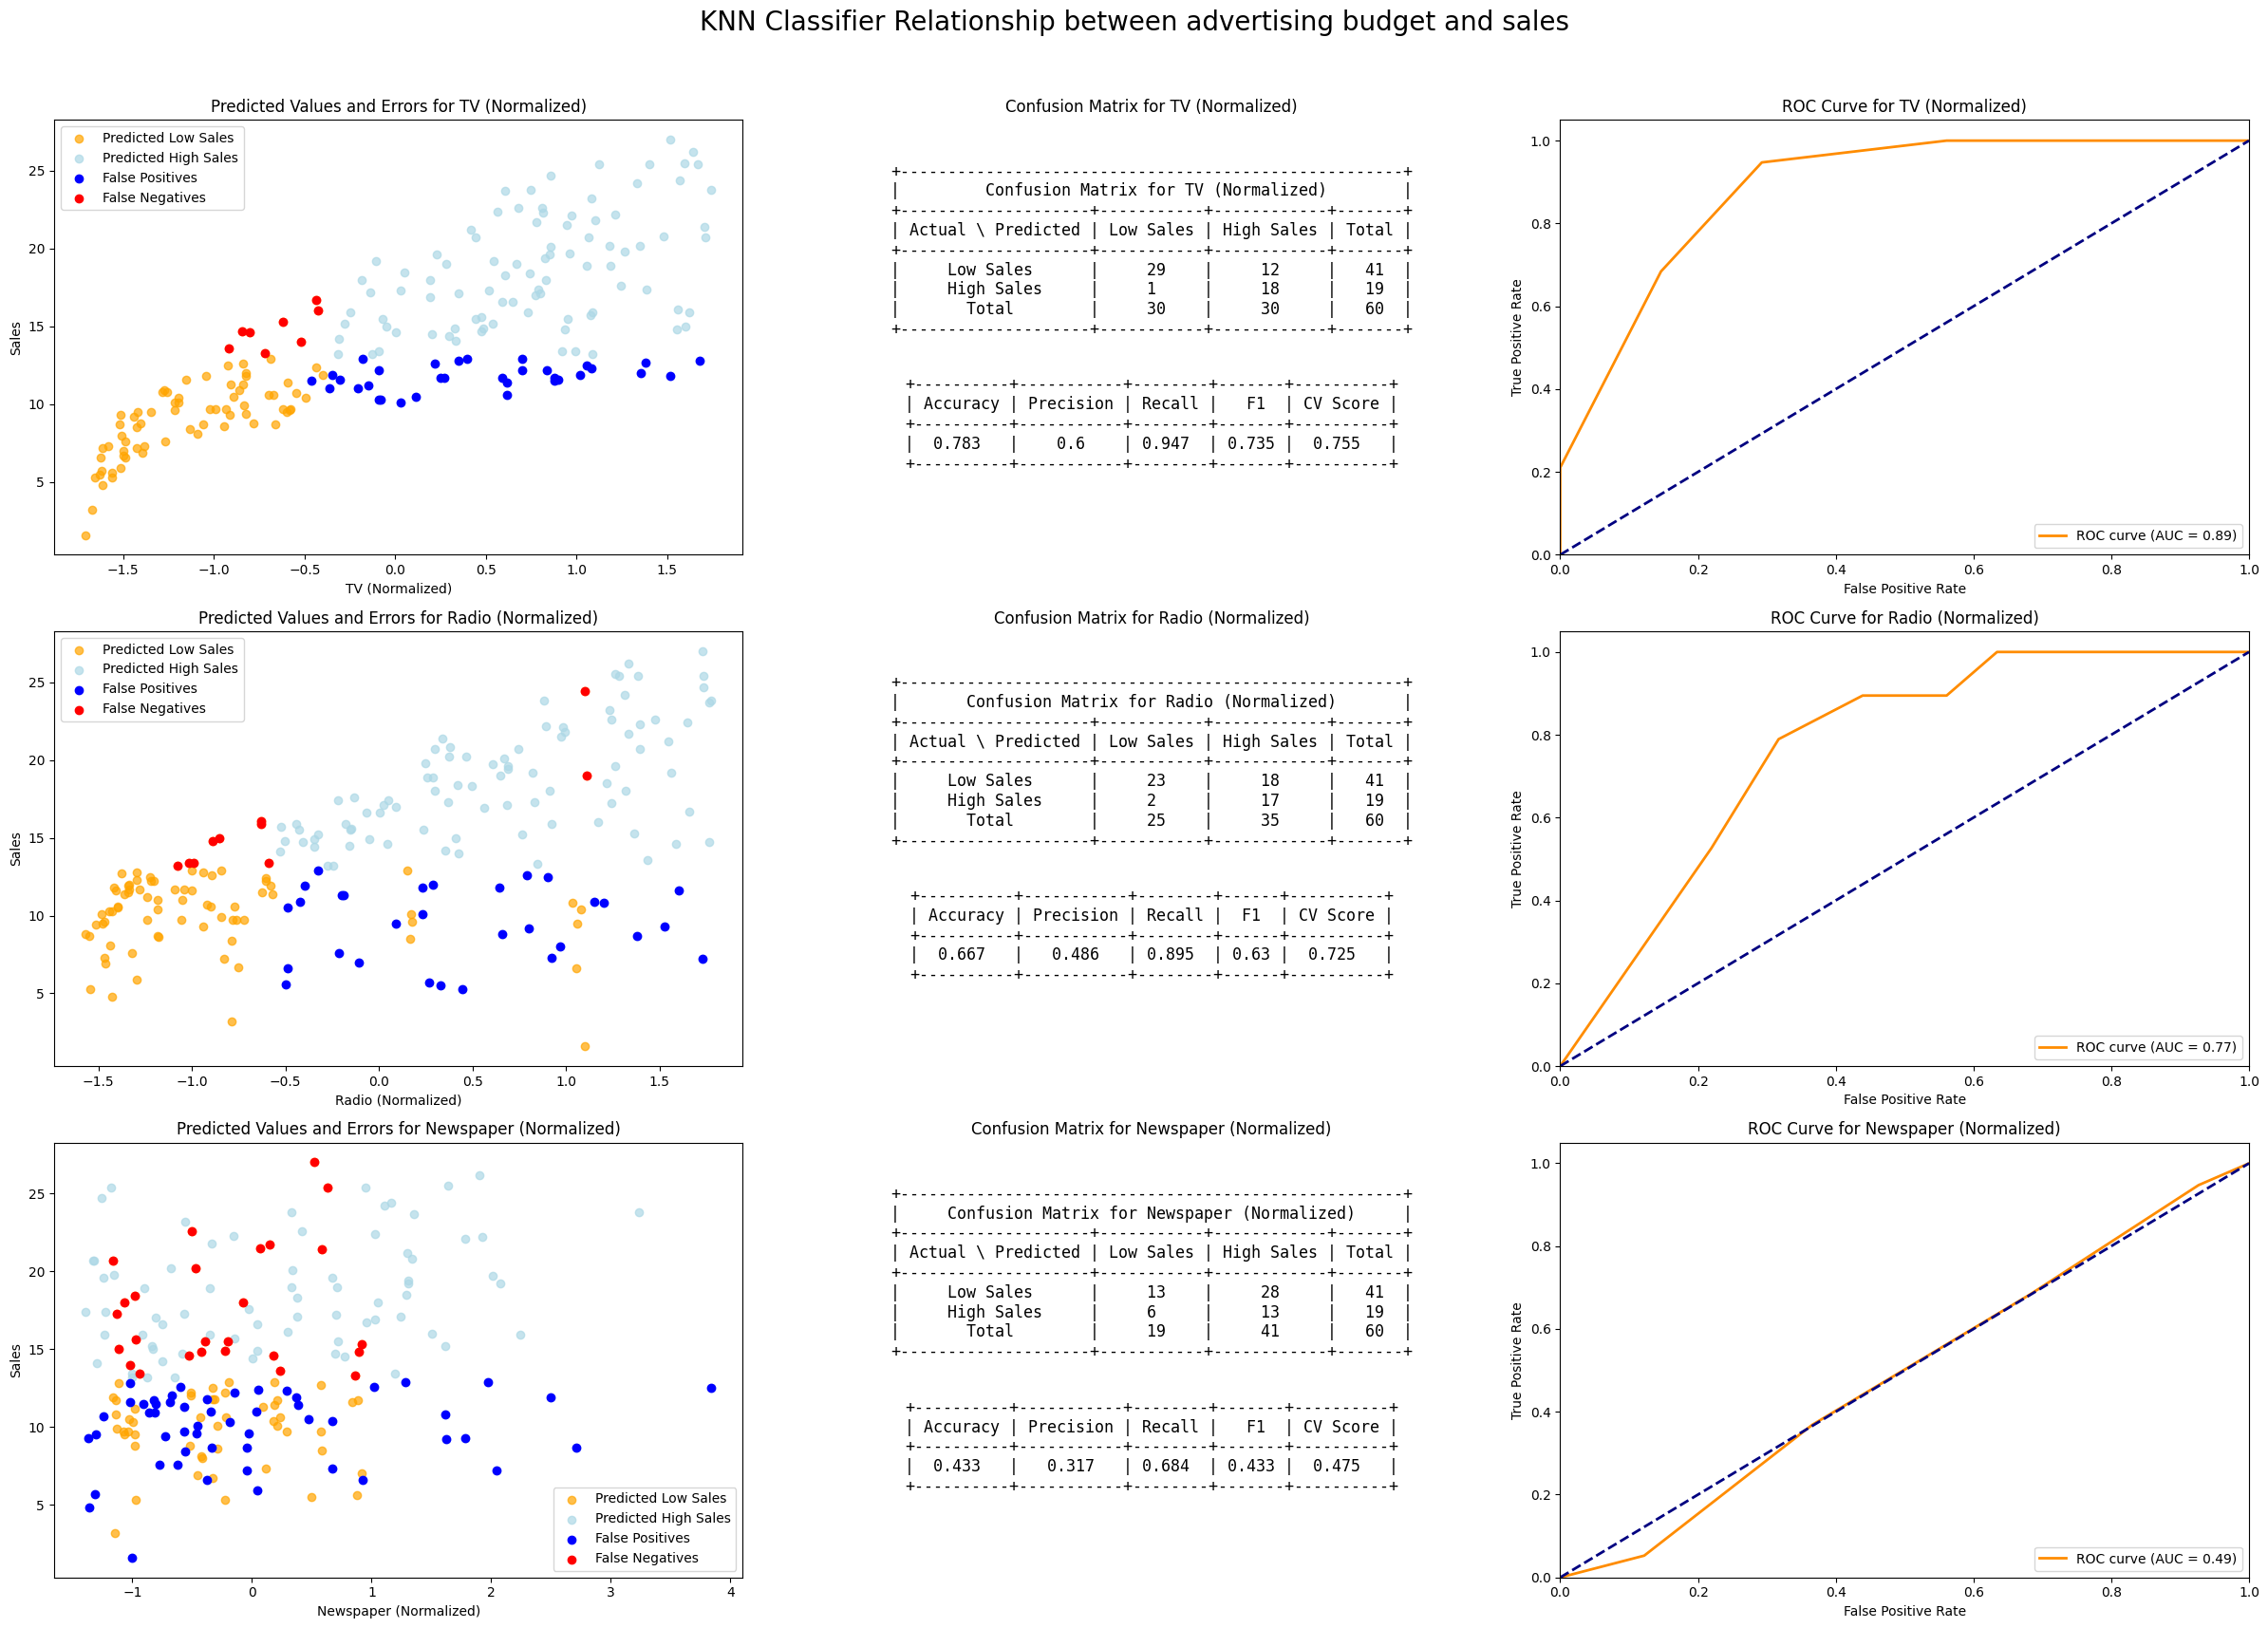

In [20]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
classification_results = evaluate_classifier(knn, 'KNN Classifier', classification_results)

###### Interpretation of the results 
When we take a view to both our KNN, Confusion matrix and ROC values, a rather interesting pattern appears. For TV and Radio, The Logistic Regression model hasa good AUC score respectivly 0.91 and 0.8. We can also see number of False positives are also rather low, but the number of false negatives is rather high.Once again we get the same issue as before. yet here we can see our predicted values follow a clear curve on the scatter plot, which is a good sign that the model is performing well. <br>
 
However, when we take a look at the Newspaper model, we can  clearly see that the model is not performing well at all. The model is not able to predict the True Positives and True Negatives correctly, with an awful low AUC score of 0.49 when normalized. this is so close to 50% that our prediction is no better than a coin flip !<br>


##### Model 3 : Logistic Regression + confusion matrix + ROC curve

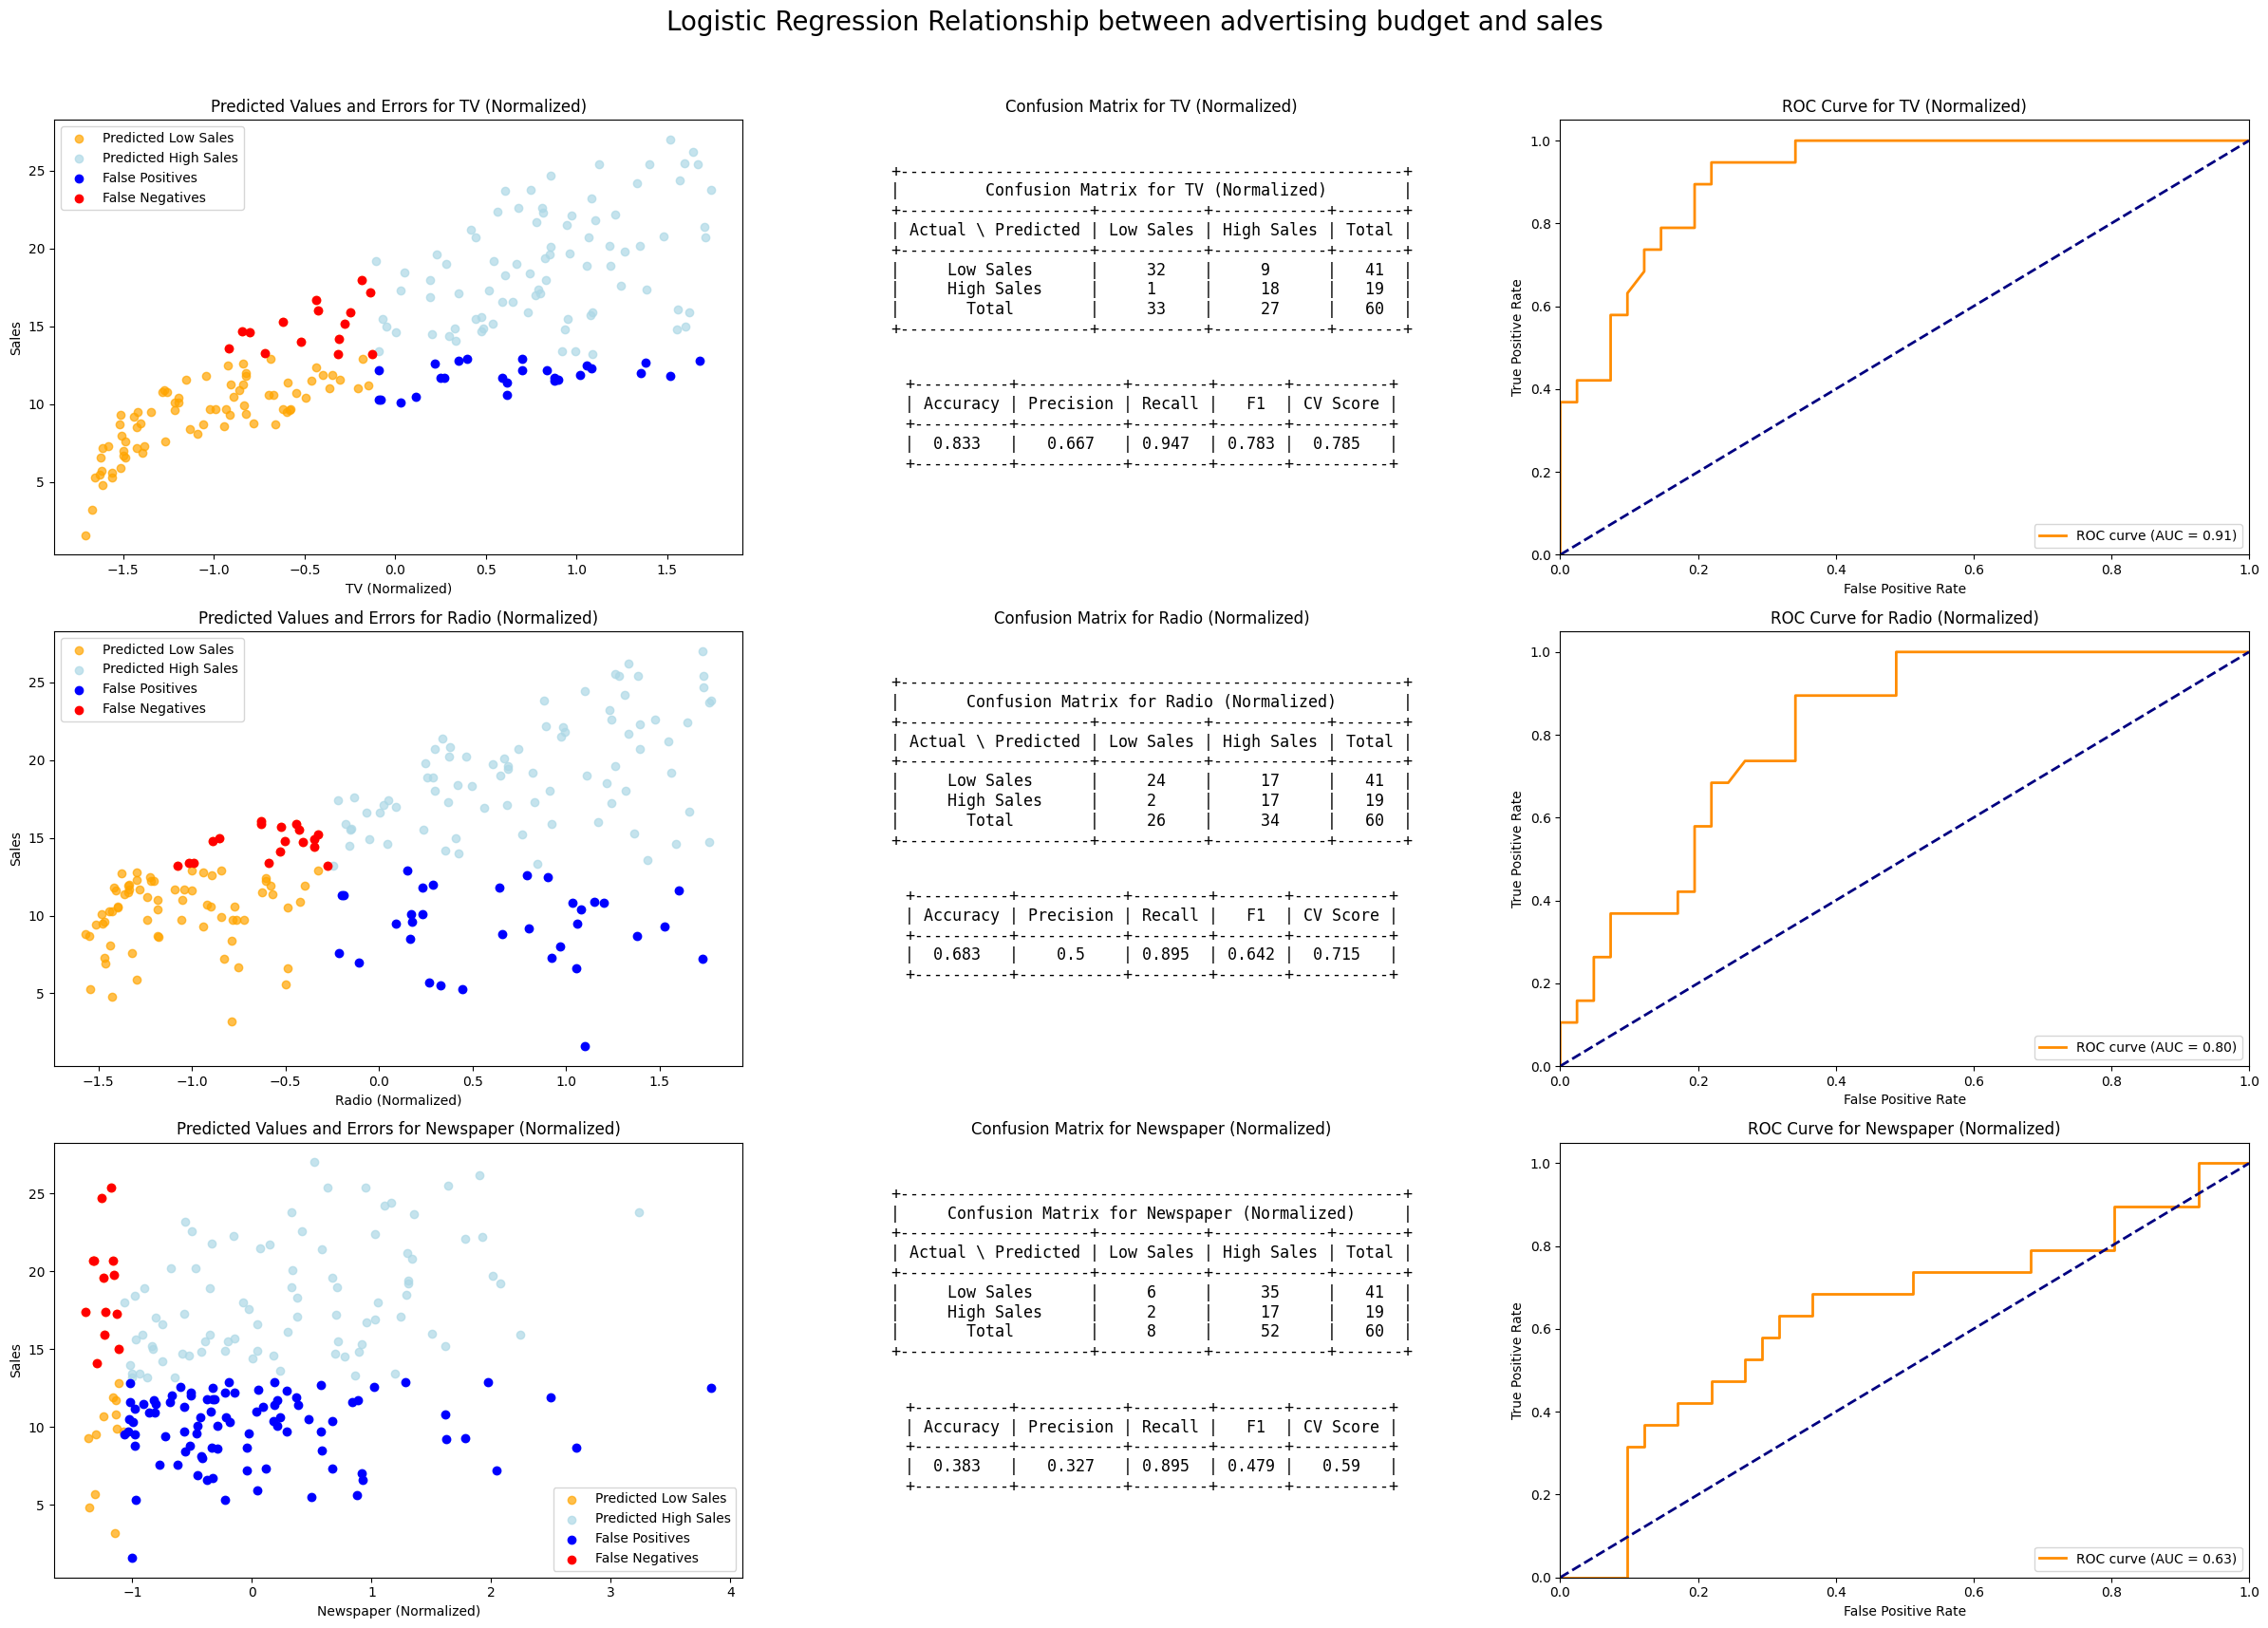

In [21]:
# Logistic Regression
model = LogisticRegression()
classification_results = evaluate_classifier(model, "Logistic Regression", classification_results)

###### Interpretation of the results 
When we take a view to both our Logistic Regression, Confusion matrix and ROC values, a rather interesting pattern appears. Once again, our TV and Radio, The Logistic Regression model have a good AUC score of 0.91 and 0.8. We can also see that once again, low sales are better predicted than high sales. Our predicted values follow once again a clear curve on the scatter plot, but we can remark the fact our clusters of predicted values are closer to each other and more uniform !<br>
 
this last observation extends tou our newspaper model, however, when we take a look at it, we can  clearly see that the model is once again not performing as well as we thought. The model is not able to predict the True Positives and True Negatives correctly, with a really low AUC score of 0.63 when normalized. <br>

to fix this, we could try to remove the outliers from the data, or try to use a different model that could be more suitable for this kind of data, like the decision tree, which we already saw has a way better predictionfor low sales<br>

When we take a view to both our Logistic Regression, Confusion matrix and ROC values, a rather interesting pattern appears. For TV and Radio, The Logistic Regression model has a good AUC score of 0.91 and 0.8. We can also see number of False Positives and False Negatives are also rather low, and  that our predicted values follow a clear curve on the scatter plot, which is a good sign that the model is performing well. <br>
 
However, when we take a look at the Newspaper model, we can  clearly see that the model is not performing as well as we thought. The model is not able to predict the True Positives and True Negatives correctly, with a really low AUC score of 0.63 when normalized. <br>

To fix this, we could try to remove the outliers from the data, or try to use a different model that could be more suitable for this kind of data, like the decision tree, which we already saw has a way better predictionfor low sales<br>

##### Model 4 : Support Vector Machine + confusion matrix + ROC curve

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

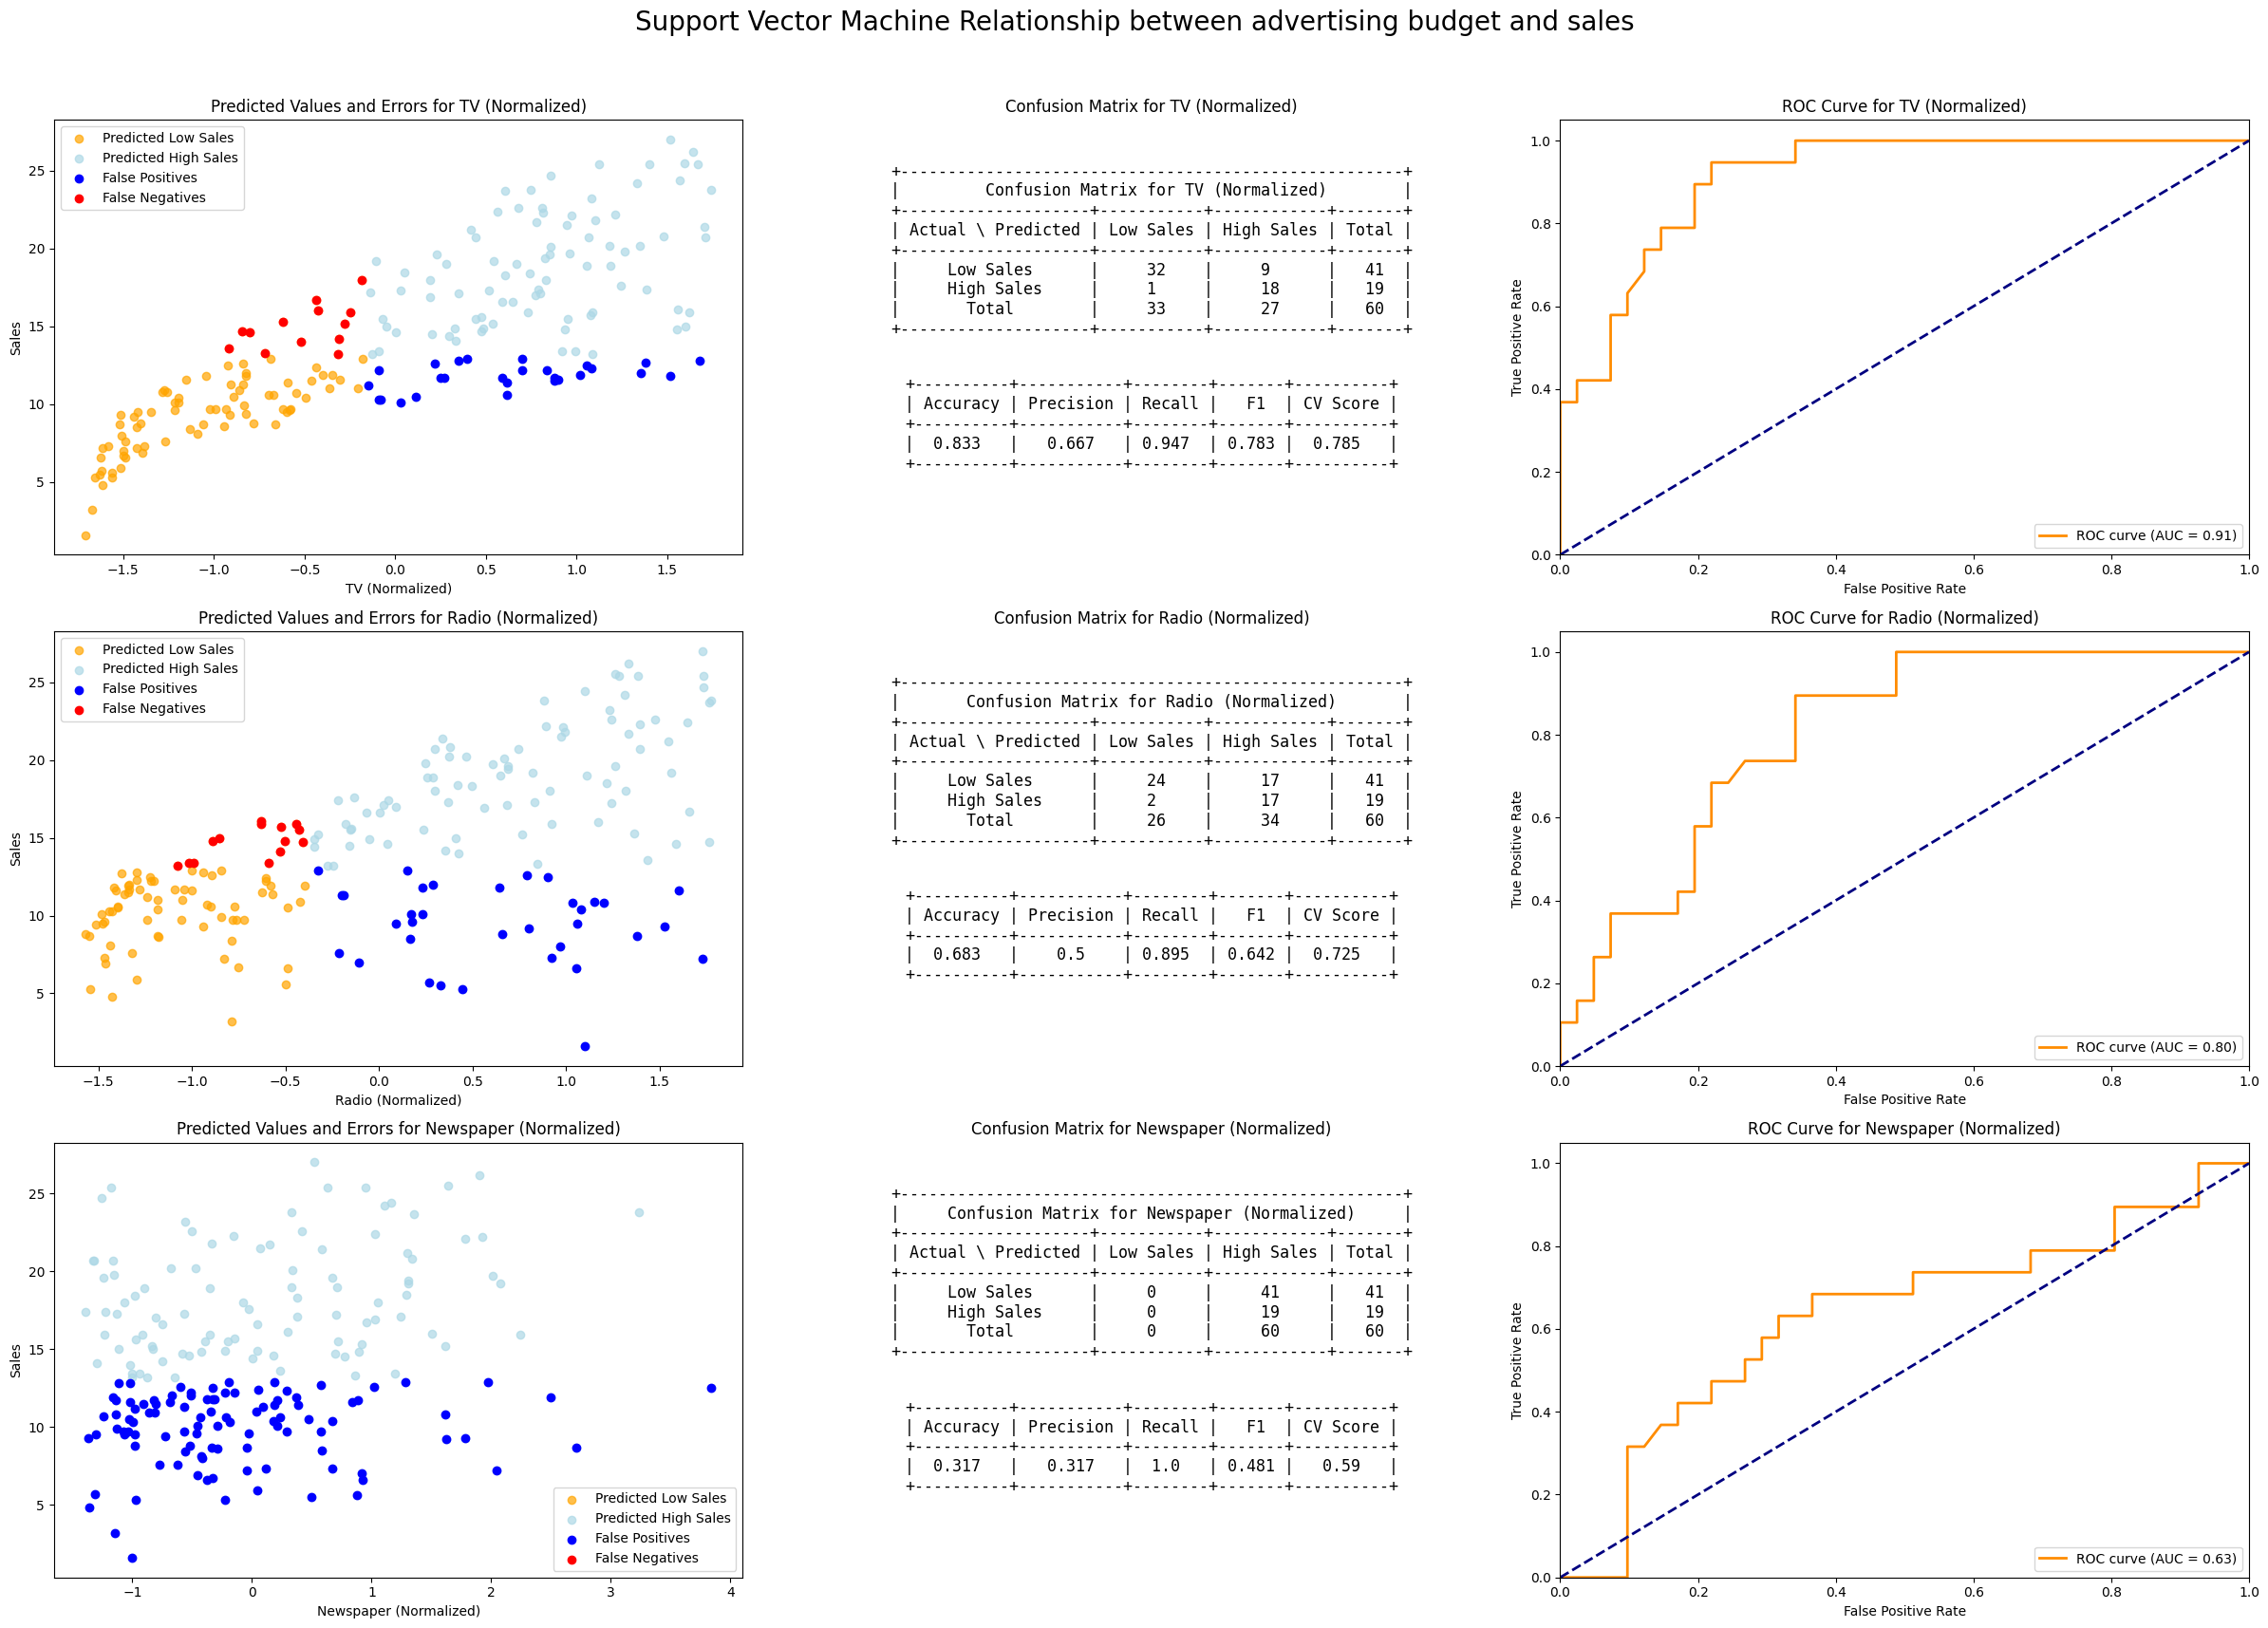

In [22]:
# Support Vector Machine
model = SVC(kernel='linear', probability=True)
classification_results = evaluate_classifier(model, "Support Vector Machine", classification_results)

###### Interpretation of the results : 

While our TV and Radio are mostly the same as in the Regresion part, we can see a difference with our Newspaper's model. the false negatives and  and true positives have been erased, and there is now a lot of false positives which where mesured. And while our AUC of 0,63 is still not that good... When we separate ourselves from the numbers and look at the graph, we now see a clear separation between the False Positives (our low sales) and our actual High sales !

This makes it seem that this version of the Newspaper model one of the best scatter-plots we currently have. A function following a straight line ( F(x) = ~13) across it cuting the high values from the low ones might be the best way to classify our newspaper data.

##### Results Interpretation and comparison
###### Raw print of the results

In [23]:
# Sort and display results table
print("\nClassification Results (sorted by F1 score):")
classification_results.sortby = "F1"
classification_results.reversesort = True

print(classification_results)
print("\nNote: Accuracy, Precision, Recall, and F1 scores range from 0 to 1, with higher values indicating better performance.")


Classification Results (sorted by F1 score):
+-----------+------------------------+----------+-------------------------+----------------------+-------+----------+
|  Feature  |         Model          | Accuracy | Precision (sensitivity) | Recall (specificity) |   F1  | CV_Score |
+-----------+------------------------+----------+-------------------------+----------------------+-------+----------+
|     TV    | Support Vector Machine |  0.833   |          0.667          |        0.947         | 0.783 |  0.785   |
|     TV    |  Logistic Regression   |  0.833   |          0.667          |        0.947         | 0.783 |  0.785   |
|     TV    |     KNN Classifier     |  0.783   |           0.6           |        0.947         | 0.735 |  0.755   |
|     TV    |     Decision Tree      |  0.667   |          0.486          |        0.947         | 0.643 |   0.79   |
|   Radio   | Support Vector Machine |  0.683   |           0.5           |        0.895         | 0.642 |  0.725   |
|   Radio 

###### Histogram of the results

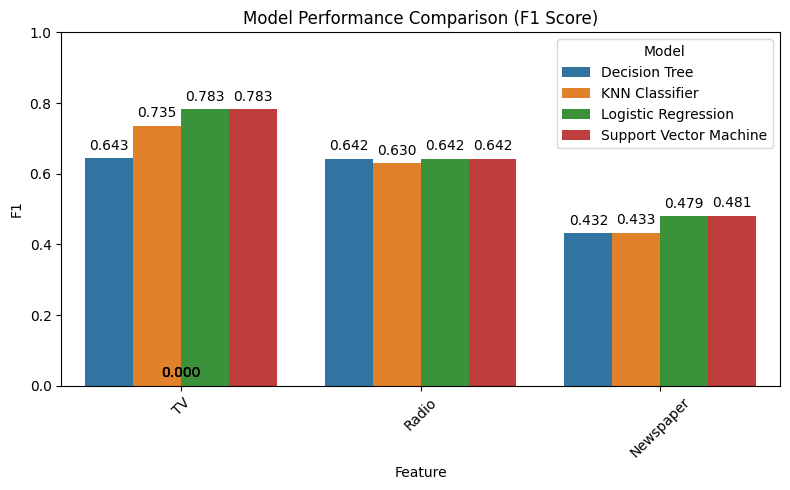

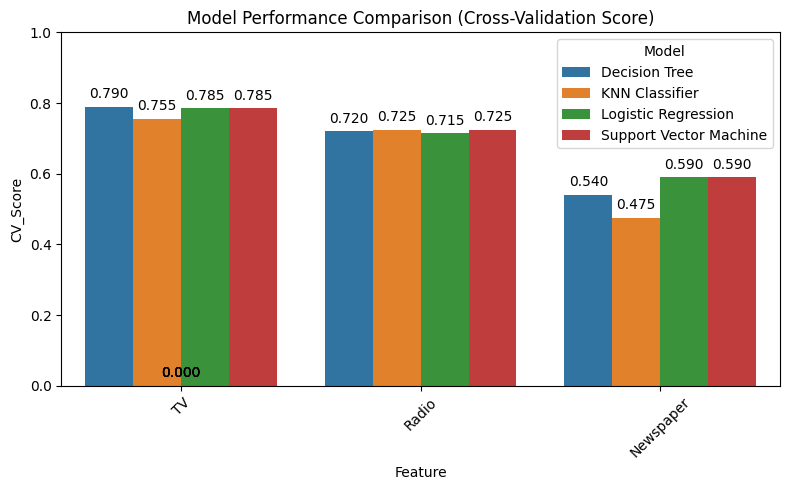

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PrettyTable to DataFrame
df_results = pd.DataFrame(
    [row for row in classification_results._rows], 
    columns=classification_results.field_names
)

# Create comparative visualizations
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(data=df_results, x='Feature', y='F1', hue='Model')
plt.title('Model Performance Comparison (F1 Score)')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.xticks(rotation=45)

# Add value labels on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.3f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.tight_layout()
plt.show()


# with the CV score
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(data=df_results, x='Feature', y='CV_Score', hue='Model')
plt.title('Model Performance Comparison (Cross-Validation Score)')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.xticks(rotation=45)

# Add value labels on the bars	
for p in bar_plot.patches:
	bar_plot.annotate(format(p.get_height(), '.3f'), 
					  (p.get_x() + p.get_width() / 2., p.get_height()), 
					  ha = 'center', va = 'center', 
					  xytext = (0, 9), 
					  textcoords = 'offset points')
 
plt.tight_layout()
plt.show()

###### observations:
Which is the best model for each feature of our data set when we compare their F1 scores ? <br>
    For TV : KNN and Logistic Regression<br>
    For Radio : Decision Tree, Logistic Regression and Support Vector Machine.<br>
    For Newspaper : Support Vector machine.<br>


##### Cross Validation for the best model
one of our best model is the Logistic Regression model for the TV feature.

In [25]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from prettytable import PrettyTable

# Split the data into training and validation sets
X_train_full, X_val, y_train_full, y_val = train_test_split(features, target_classified, test_size=0.2, random_state=RANDOM_STATE)

# Create fold for our cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Create a table to store the results
cv_results = PrettyTable()
cv_results.field_names = ['Feature', 'Model', 'Fold', 'Accuracy', 'Precision', 'Recall', 'F1']

# Test the cross-validation with a logistic regression model on the TV feature
for i, (train_index, test_index) in enumerate(kf.split(X_train_full[:, 0])):
    X_train, X_test = X_train_full[:, 0][train_index].reshape(-1, 1), X_train_full[:, 0][test_index].reshape(-1, 1)
    y_train, y_test = y_train_full.iloc[train_index], y_train_full.iloc[test_index]
    
    # Fit the model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate model performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']
    
    # Append to results DataFrame
    cv_results.add_row([feature_names[0], 'Logistic Regression', i+1, round(accuracy, 3), round(precision, 3), round(recall, 3), round(f1, 3)])

# Calculate the average of the cross-validation results for each metric
accuracy_avg = sum(float(row[3]) for row in cv_results._rows) / len(cv_results._rows)
precision_avg = sum(float(row[4]) for row in cv_results._rows) / len(cv_results._rows)
recall_avg = sum(float(row[5]) for row in cv_results._rows) / len(cv_results._rows)
f1_avg = sum(float(row[6]) for row in cv_results._rows) / len(cv_results._rows)

# Create a new PrettyTable for the average results
cv_results.add_row(['Average', '-', '-', 
                        round(accuracy_avg, 3), 
                        round(precision_avg, 3), 
                        round(recall_avg, 3), 
                        round(f1_avg, 3)])


# Train the final model on the entire training set
final_model = LogisticRegression()
final_model.fit(X_train_full[:, 0].reshape(-1, 1), y_train_full)

# Evaluate the final model on the validation set
y_val_pred = final_model.predict(X_val[:, 0].reshape(-1, 1))
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred, output_dict=True)
val_precision = val_report['1']['precision']
val_recall = val_report['1']['recall']
val_f1 = val_report['1']['f1-score']

cv_results.add_row(['Validation', 'Logistic Regression', 'ALL',
                    round(val_accuracy, 3), 
                    round(val_precision, 3), 
                    round(val_recall, 3), 
                    round(val_f1, 3)])

# Display the cross-validation results
print("\nCross-Validation Results:")
print(cv_results)


Cross-Validation Results:
+------------+---------------------+------+----------+-----------+--------+-------+
|  Feature   |        Model        | Fold | Accuracy | Precision | Recall |   F1  |
+------------+---------------------+------+----------+-----------+--------+-------+
|     TV     | Logistic Regression |  1   |   0.75   |    0.5    | 0.875  | 0.636 |
|     TV     | Logistic Regression |  2   |  0.719   |   0.688   | 0.733  |  0.71 |
|     TV     | Logistic Regression |  3   |  0.812   |   0.842   | 0.842  | 0.842 |
|     TV     | Logistic Regression |  4   |  0.656   |   0.812   | 0.619  | 0.703 |
|     TV     | Logistic Regression |  5   |  0.875   |   0.895   | 0.895  | 0.895 |
|  Average   |          -          |  -   |  0.762   |   0.747   | 0.793  | 0.757 |
| Validation | Logistic Regression | ALL  |  0.875   |   0.789   | 0.938  | 0.857 |
+------------+---------------------+------+----------+-----------+--------+-------+


###### Observations:

The cross validation shows that the model is not overfitting the data because the training and testing scores are close to each other on each fold. <br>

In general, the model is quite good at predicting the target Sales overall with a mean F1 score of 0.757.

#### **2.2: PCA (20 points)**

- Apply PCA and train the classification model of your choice.
- Display, print or plot any relevant information.
- Discuss how PCA affects model performance and interpret the results.

In [26]:
# create the data table to store the results
PCA_results = PrettyTable()
PCA_results.field_names = ['Feature', 'Model', 'Accuracy', 'Precision (sensitivity)', 'Recall (specificity)', 'F1', 'CV_Score','Cumulative Variance']

In [27]:
def plot_pca(features, dim_names,PCA_results):   
    # Stardadize the dataset
    scaler = StandardScaler()
    X_std = scaler.fit_transform(features)
    print("Dataset mean:", X_std.mean())
    print("Dataset std:", X_std.std())

    # Apply PCA for dimensionality reduction
    n_components = features.shape[1]  # Use all components
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_std)
  
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # custom color palette
    cmap = mcolors.ListedColormap(['orange', 'lightblue'])

    # Plot PCA results on the first subplot
    axes[0].scatter(X_pca[target_classified == 0, 0], X_pca[target_classified == 0, 1],
                c='orange', alpha=0.7, label='Low Sales')
    axes[0].scatter(X_pca[target_classified == 1, 0], X_pca[target_classified == 1, 1],
                    c='lightblue', alpha=0.7, label='High Sales')
    axes[0].set_xlabel('Principal Component 1')
    axes[0].set_ylabel('Principal Component 2')
    axes[0].set_title('PCA: Advertising Dataset' + dim_names)
    axes[0].legend()

    # Plot explained variance ratio on the second subplot
    axes[1].bar(range(1, n_components + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
    axes[1].set_xlabel('Principal Components')
    axes[1].set_ylabel('Explained Variance Ratio')
    axes[1].set_title('Explained Variance Ratio by Principal Components' + dim_names)

    plt.tight_layout()
    plt.show()
    
    # calculate the results of the PCA
    X_train, X_test, y_train, y_test = train_test_split(X_pca, target_classified, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']
    cv_score = cross_val_score(model, X_pca, target_classified, cv=5).mean()
    cumulative_variance = pca.explained_variance_ratio_[:2].sum()
    
    # Append to results DataFrame
    PCA_results.add_row([dim_names, 'Logistic Regression', round(accuracy, 3), round(precision, 3), round(recall, 3), round(f1, 3), round(cv_score, 3), round(cumulative_variance, 3)] )
    
    return PCA_results
    
    

##### PCA of all the 3 features

Dataset mean: -2.960594732333751e-17
Dataset std: 1.0


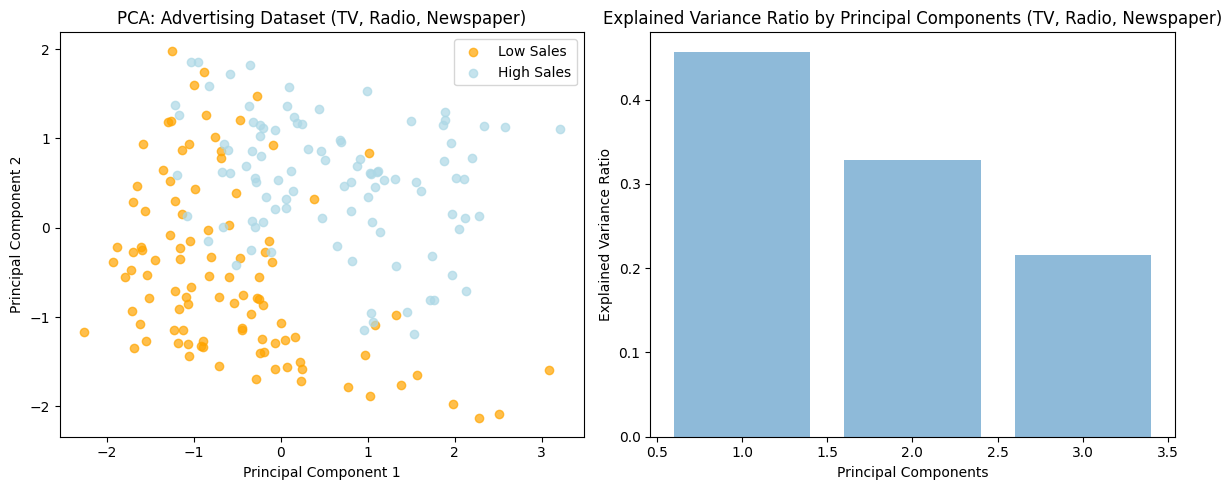

In [28]:
# Call the function to plot PCA inside subset
PCA_results = plot_pca(features, " (TV, Radio, Newspaper)",PCA_results)

##### PCA of the TV / Radio features

Dataset mean: -1.6542323066914832e-16
Dataset std: 1.0


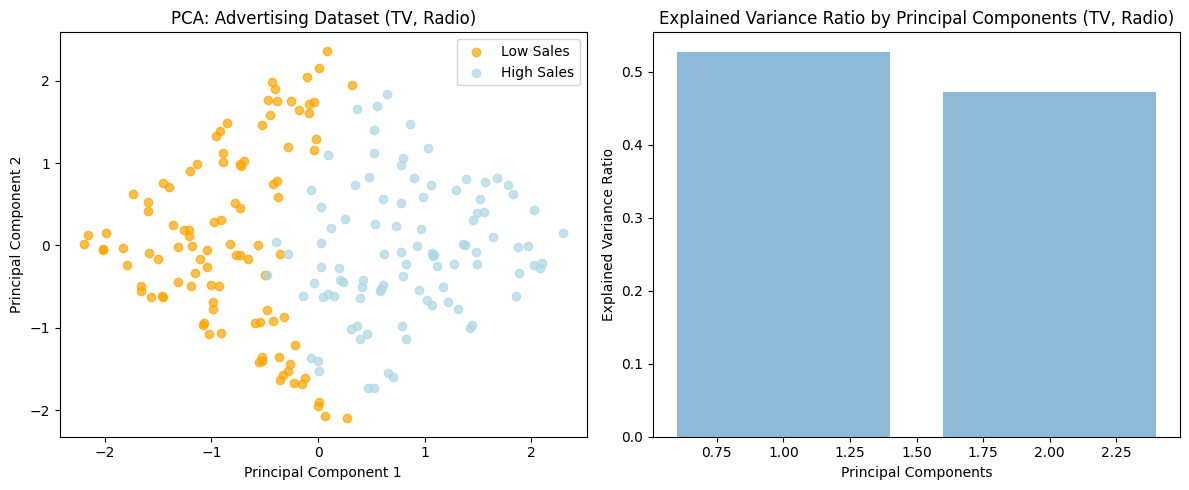

In [29]:
PCA_results = plot_pca(features[:, :2], " (TV, Radio)",PCA_results)

###### Observations:

The first PCA component the plot of the graph allow us to see that the 2 first components are able to separate quite well the 2 classes. But there is like noise in the data that make the separation not perfect. Only 78% of the variance of the data is explained by the 2 first components. <br>

To try to avoid this noise, we have decided to use the first 2 PCA components to train the Logistic Regression model. <br>
This have improved the model separation of the 2 classes and now the 2 main components are able explain all the variance of the data. But that normal because we have used the 2 main components. <br>

In [30]:
# Display the results
print("\nPCA Results:")
print(PCA_results)


PCA Results:
+-------------------------+---------------------+----------+-------------------------+----------------------+-------+----------+---------------------+
|         Feature         |        Model        | Accuracy | Precision (sensitivity) | Recall (specificity) |   F1  | CV_Score | Cumulative Variance |
+-------------------------+---------------------+----------+-------------------------+----------------------+-------+----------+---------------------+
|  (TV, Radio, Newspaper) | Logistic Regression |  0.933   |          0.857          |        0.947         |  0.9  |  0.935   |        0.785        |
|        (TV, Radio)      | Logistic Regression |  0.917   |          0.818          |        0.947         | 0.878 |  0.935   |         1.0         |
+-------------------------+---------------------+----------+-------------------------+----------------------+-------+----------+---------------------+


###### Interpretation of the results

With the PDA applied to the Logistic Regression model, the model is now able to predict the target Sales with a really good accuracy of 0.933. <br>

Despite our original thought that the 

---

## **Task 3 (Bonus): Unsupervised Learning**

In this task, you will use unsupervised learning techniques to explore and segment the data based on advertising budgets.

### **1. Clustering (10 points)**

#### **1.1: K-Means (10 points)**

- Apply K-Means clustering to segment the data. Feel free to use any feature or combinaison.
- Display, print or plot any relevant information.
- Discuss the characteristics of each cluster.

##### K-Means clustering of the data on all the features

C:\Users\david\AppData\Local\Temp\ipykernel_49676\971241519.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clustering_results = pd.concat([clustering_results, pd.DataFrame([new_row])], ignore_index=True)


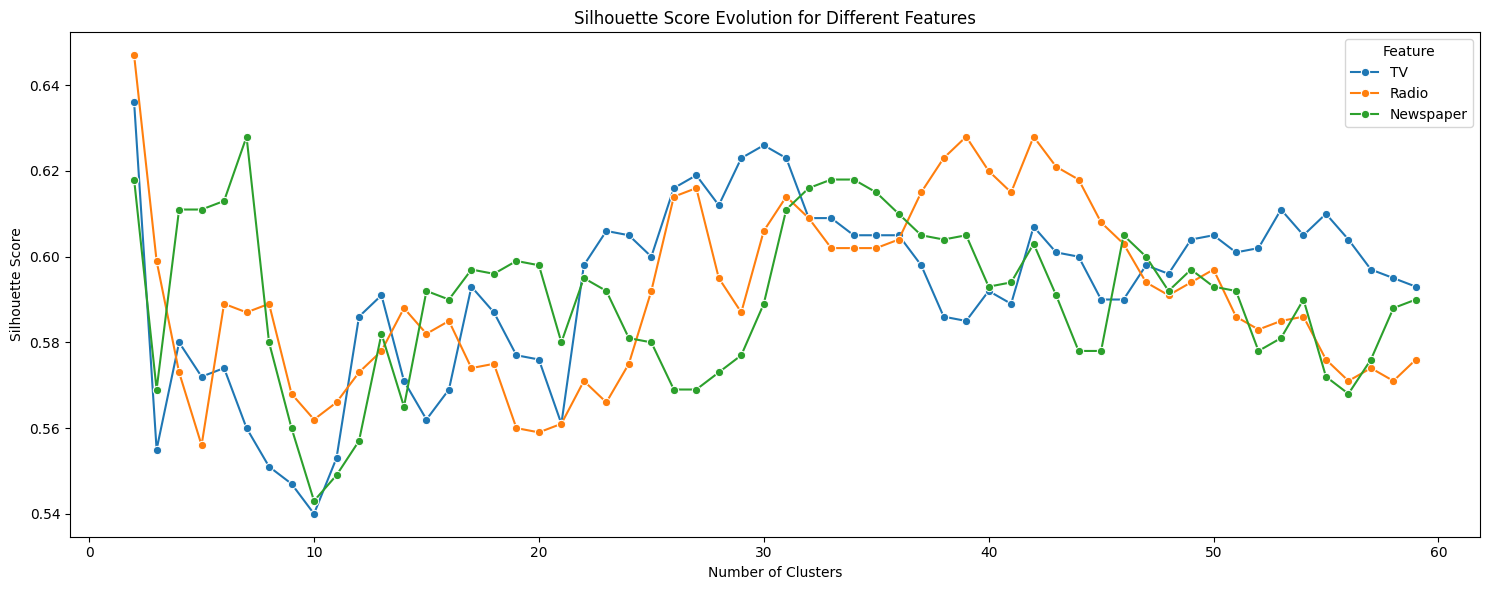

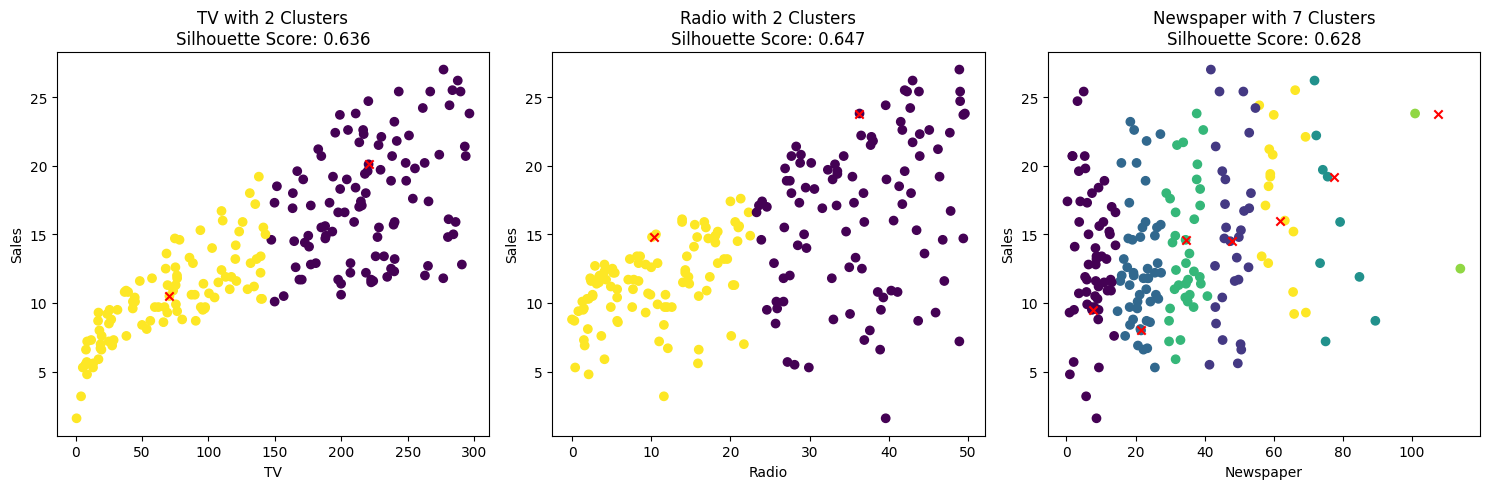

+-----------+--------------------+------------------+
|  Feature  | Number of Clusters | Silhouette Score |
+-----------+--------------------+------------------+
|     TV    |         2          |      0.636       |
|     TV    |         3          |      0.555       |
|     TV    |         4          |       0.58       |
|     TV    |         5          |      0.572       |
|     TV    |         6          |      0.574       |
|     TV    |         7          |       0.56       |
|     TV    |         8          |      0.551       |
|     TV    |         9          |      0.547       |
|     TV    |         10         |       0.54       |
|     TV    |         11         |      0.553       |
|     TV    |         12         |      0.586       |
|     TV    |         13         |      0.591       |
|     TV    |         14         |      0.571       |
|     TV    |         15         |      0.562       |
|     TV    |         16         |      0.569       |
|     TV    |         17    

In [31]:
# Define the number of clusters
number_of_clusters = np.arange(2, 60)

# Create a table to store the clustering results
clustering_results = pd.DataFrame(columns=['Feature', 'Number of Clusters', 'Silhouette Score'])

# Iterate over features and models
for i in range(len(feature_names)):
    X_train, X_test, y_train, y_test = train_test_split(features[:, i].reshape(-1, 1), target, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    
    # for each number of clusters
    for n_clusters in number_of_clusters:
        # Create KMeans model
        kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE)
        y_pred = kmeans.fit_predict(X_train)
        
        # Calculate silhouette score
        silhouette = round(silhouette_score(X_train, y_pred), 3)
        
        # Add results
        new_row = {
            'Feature': feature_names[i],
            'Number of Clusters': n_clusters,
            'Silhouette Score': silhouette
        }
        
        clustering_results = pd.concat([clustering_results, pd.DataFrame([new_row])], ignore_index=True)

# Plot the silhouette score evolution for each feature
plt.figure(figsize=(15, 6))
sns.lineplot(data=clustering_results, x='Number of Clusters', y='Silhouette Score', hue='Feature', marker='o')
plt.title('Silhouette Score Evolution for Different Features')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

# Find the best number of clusters for each feature
best_clusters = clustering_results.loc[clustering_results.groupby('Feature')['Silhouette Score'].idxmax()]

# Visualize the clusters for the best number of clusters for each feature horizontally
num_features = len(feature_names)
fig, axes = plt.subplots(1, num_features, figsize=(5 * num_features, 5))

for i, ax in enumerate(axes):
    feature = feature_names[i]
    best_n_clusters = best_clusters[best_clusters['Feature'] == feature]['Number of Clusters'].values[0]
    best_silhouette = best_clusters[best_clusters['Feature'] == feature]['Silhouette Score'].values[0]
    
    # Create KMeans model with the best number of clusters
    kmeans = KMeans(n_clusters=best_n_clusters, random_state=RANDOM_STATE)
    y_pred = kmeans.fit_predict(features[:, i].reshape(-1, 1))
    
    # Plot the clusters
    ax.scatter(features[:, i], target, c=y_pred, cmap='viridis')
    for center in kmeans.cluster_centers_:
        ax.scatter(center, target[np.argmin(np.abs(features[:, i] - center))], c='red', marker='x')
    ax.set_title(f'{feature} with {best_n_clusters} Clusters\nSilhouette Score: {best_silhouette}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Sales')

plt.tight_layout()
plt.show()

# Display results table
table = PrettyTable()
table.field_names = clustering_results.columns
for row in clustering_results.itertuples(index=False):
    table.add_row(row)
print(table)
print("\nNote: Higher silhouette score indicates better clustering")


###### Observations

We have observed that the k-means algorithm has acheive to create quite good clusters.
For exmaple for the TV feature, the algorithm has best performed with 2 clusters, and the clusters are well separated. (pratically separated the bugdet of advertising in two groups)

For the other features, the algorithm has also performed well, but for the Newspaper feature, the clusters are not as well separated as the other features. This is because the Newspaper feature does not have a relationship with the target Sales. <br>

##### K-Means clustering of the data on the TV / Radio features TOGETHER

C:\Users\david\AppData\Local\Temp\ipykernel_49676\2346153261.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clustering_results = pd.concat([clustering_results, pd.DataFrame([new_row])], ignore_index=True)


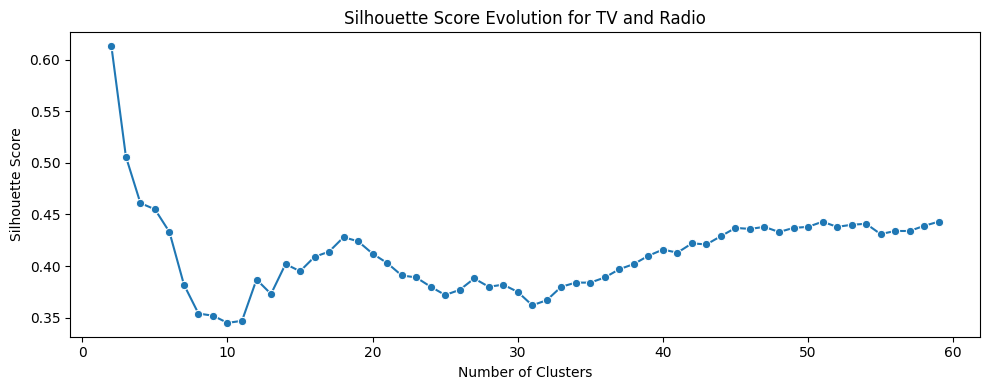

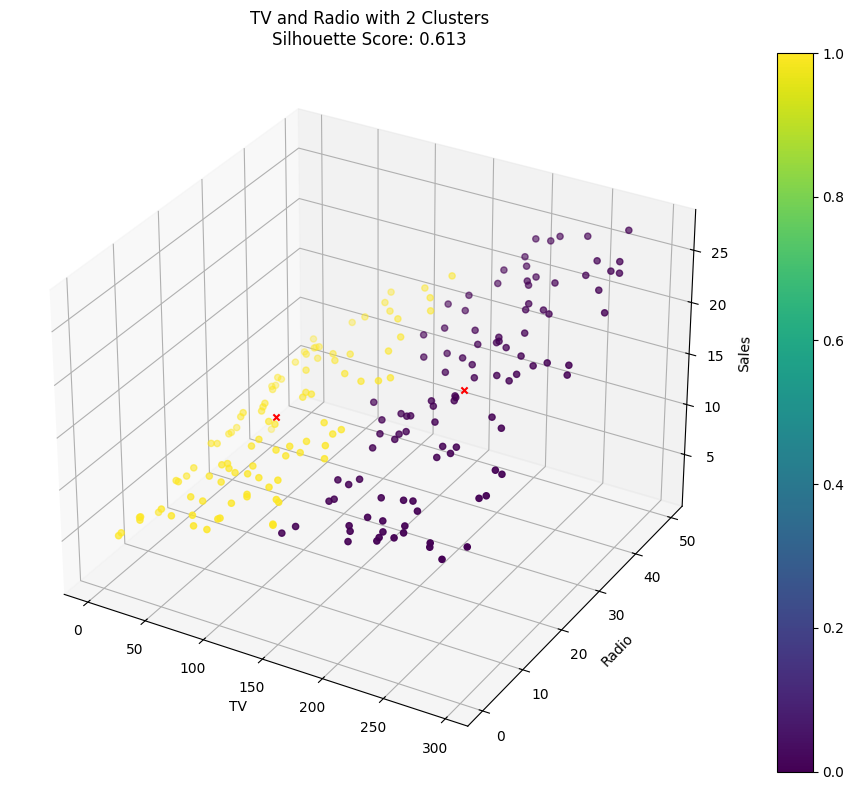

In [32]:
# Create a table to store the clustering results
clustering_results = pd.DataFrame(columns=['Number of Clusters', 'Silhouette Score'])

# for each number of clusters
for n_clusters in number_of_clusters:
    # Create KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE)
    y_pred = kmeans.fit_predict(features[:, :2])
    
    # Calculate silhouette score
    silhouette = round(silhouette_score(features[:, :2], y_pred), 3)
    
    # Add results
    new_row = {
        'Number of Clusters': n_clusters,
        'Silhouette Score': silhouette
    }
    
    clustering_results = pd.concat([clustering_results, pd.DataFrame([new_row])], ignore_index=True)
    
    # Plot the silhouette score evolution for the 2 first features 
plt.figure(figsize=(10, 4))
sns.lineplot(data=clustering_results, x='Number of Clusters', y='Silhouette Score', marker='o')
plt.title('Silhouette Score Evolution for TV and Radio')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()


# Find the best number of clusters for the 2 first features
best_clusters = clustering_results.loc[clustering_results['Silhouette Score'].idxmax()]

# Visualize the clusters for the best number of clusters for the 2 first features
best_n_clusters = best_clusters['Number of Clusters']
best_silhouette = best_clusters['Silhouette Score']

# plot the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
kmeans = KMeans(n_clusters=best_n_clusters, random_state=RANDOM_STATE)
y_pred = kmeans.fit_predict(features[:, :2])

# Plot the clusters
sc = ax.scatter(features[:, 0], features[:, 1], target, c=y_pred, cmap='viridis')
for center in kmeans.cluster_centers_:
    ax.scatter(center[0], center[1], target[np.argmin(np.linalg.norm(features[:, :2] - center, axis=1))], c='red', marker='x')
ax.set_title(f'TV and Radio with {best_n_clusters} Clusters\nSilhouette Score: {best_silhouette}')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.colorbar(sc)
plt.tight_layout()
plt.show()


###### Observations:

What we can see is that the K-means algorithm has been able to create clusters that are well separated for the TV and Radio features. <br>